In [3]:
## run this cell, then restart your kernel. Do not rerun this cell again until your kernel either crashes or it's been a few hours. 
!pip install plotnine
!pip install matplotlib==3.8.3

!pip install scikit-misc

!pip install seaborn

!pip install --upgrade seaborn matplotlib

  Using cached plotnine-0.14.5-py3-none-any.whl.metadata (9.3 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached mizani-0.13.2-py3-none-any.whl.metadata (4.8 kB)
  Using cached numpy-2.2.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached plotnine-0.14.5-py3-none-any.whl (1.3 MB)
Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached mizani-0.13.2-py3-none-any.whl (127 kB)
Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing inst

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotnine import *
from plotnine.data import *
from skmisc import *

# All the cool plots need to be changed to code from markdown, or need a ## taken away to run (crashing jupyter on my laptop)

# Check Point 1: Dataframes and Sites

_Load in Reef Check California to pd.dataframe_

In [4]:
invert_rcca = pd.read_csv('Invert_California_raw_2024.csv')

## convert all dates used to datetime type object - important for later
invert_rcca.Date = pd.to_datetime(invert_rcca.Date)

## added an area column (2 is representative of the 2meter transect used)
invert_rcca['Area_m2']=invert_rcca.Distance*2

invert_rcca

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Size,Distance,Area_m2
0,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Bat Star,13,NaN,30.0,60.0
1,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Black Abalone,0,NaN,30.0,60.0
2,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Brown/Golden Gorgonian,11,NaN,30.0,60.0
3,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,California Sea Cucumber,0,NaN,30.0,60.0
4,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,California Spiny Lobster,0,NaN,30.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289080,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Sheep/Masking Crab,0,NaN,30.0,60.0
289081,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Short Spined Sea Star,0,NaN,30.0,60.0
289082,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Sunflower Star,0,NaN,30.0,60.0
289083,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Warty Sea Cucumber,8,NaN,30.0,60.0


_**From ReefCheck KRM Data Description**_
Distance: The distance along the transect in meters that was counted. Transects are 2m wide and 30 meters long so that if the distance is 30 the total area counted is 60m2 .Transects can be subsampled in areas of high abundance resulting in distances less than 30. 


Should take Distance(m) * 2(m) = Area of Survey (m^2)



<mark style="background-color: lightblue">After working through Kelp and SciDiv Data, I am post-hencingly adding ```Dateordinal```, ```Day```, and ```Month``` columns</mark>

In [5]:
invert_rcca['Day'] = invert_rcca.Date.dt.day
invert_rcca['Month'] = invert_rcca['Date'].dt.strftime('%b')
invert_rcca['Year'] = invert_rcca.Date.dt.year

In [6]:
invert_rcca['Month_Day'] = invert_rcca['Date'].dt.strftime('%b-%d')
invert_rcca['Dateordinal'] = [i.toordinal() for i in invert_rcca.Date]
invert_rcca['DayofYear'] = [i.dayofyear for i in invert_rcca.Date]

In [7]:
invert_rcca['Date'].dt.strftime('%b-%d')
invert_rcca

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Size,Distance,Area_m2,Day,Month,Month_Day,Dateordinal,DayofYear
0,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Bat Star,13,NaN,30.0,60.0,1,Oct,Oct-01,732585,274
1,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Black Abalone,0,NaN,30.0,60.0,1,Oct,Oct-01,732585,274
2,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,Brown/Golden Gorgonian,11,NaN,30.0,60.0,1,Oct,Oct-01,732585,274
3,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,California Sea Cucumber,0,NaN,30.0,60.0,1,Oct,Oct-01,732585,274
4,120 Reef,33.737919,-118.392014,2006,2006-10-01,28.0,1,California Spiny Lobster,0,NaN,30.0,60.0,1,Oct,Oct-01,732585,274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289080,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Sheep/Masking Crab,0,NaN,30.0,60.0,7,Nov,Nov-07,735179,311
289081,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Short Spined Sea Star,0,NaN,30.0,60.0,7,Nov,Nov-07,735179,311
289082,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Sunflower Star,0,NaN,30.0,60.0,7,Nov,Nov-07,735179,311
289083,Yellowbanks,33.998798,-119.550499,2013,2013-11-07,22.0,6,Warty Sea Cucumber,8,NaN,30.0,60.0,7,Nov,Nov-07,735179,311


_Later, I start looking at what species are present or absent at certain beaches compared to the larger group of beaches and temporally. The code below creates sets of the species counted by reefcheck in CA_

In [8]:
## All the invertebrate species looked for in CA reefs
rcca_species = set(invert_rcca.Classcode.unique())
rcca_species
## All the invertebrate species found in CA reefs
found_rcca_species = set(invert_rcca[invert_rcca.Amount!=0].Classcode.unique())
found_rcca_species



{'Bat Star',
 'Black Abalone',
 'Black Sea Hare',
 'Brown/Golden Gorgonian',
 'California Sea Cucumber',
 'California Sea Hare',
 'California Spiny Lobster',
 'Chestnut Cowry',
 'Crowned Urchin',
 'Flat Abalone',
 'Giant Keyhole Limpet',
 'Giant Spined Star',
 'Green Abalone',
 'Gumboot Chiton',
 "Kellet's Whelk",
 'Large Anemone',
 'Leather Star',
 'Masking Crab',
 'Ochre Star',
 'Pink Abalone',
 'Pinto Abalone',
 'Purple Urchin',
 'Red Abalone',
 'Red Gorgonian',
 'Red Urchin',
 'Rock Crab',
 'Rock Scallop',
 'Sheep/Masking Crab',
 'Short Spined Sea Star',
 'Starry Urchin',
 'Sun Star',
 'Sunflower Star',
 'Warty Sea Cucumber',
 'Wavy/Red Turban Snail'}

_The code below is me seeing the range of reefs surveyed close to the site of interest_

In [9]:
invert_rcca.groupby('Site')['Latitude'].mean().sort_values(ascending=False).head(15)
## Can see big gap between Trinidad and MacKerricher
## General region we are investigating is from 39 to 40 deg north

Site
Macklyn Cove              42.045155
Pyramid Point             41.994801
Flat Iron Rock            41.059425
Trinidad                  41.054240
MacKerricher North        39.490631
Glass Beach               39.452350
Caspar North              39.364647
Caspar South              39.361729
Frolic Cove               39.355026
Russian Gulch             39.327984
Mendocino Headlands       39.305283
Portuguese Beach          39.302264
Van Damme                 39.271915
Albion Cove               39.227780
Point Arena Lighthouse    38.952272
Name: Latitude, dtype: float64

**_Filter rcca data to Fort Bragg Region_**

In [10]:
ftbrgg_invert_rcca = invert_rcca[(invert_rcca.Latitude<= 40) & (invert_rcca.Latitude>=39)]
ftbrgg_invert_rcca

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Size,Distance,Area_m2,Day,Month,Month_Day,Dateordinal,DayofYear
5211,Albion Cove,39.227780,-123.772610,2018,2018-05-08,21.0,1,Bat Star,10,NaN,30.0,60.0,8,May,May-08,736822,128
5212,Albion Cove,39.227780,-123.772610,2018,2018-05-08,21.0,1,Black Abalone,0,NaN,30.0,60.0,8,May,May-08,736822,128
5213,Albion Cove,39.227780,-123.772610,2018,2018-05-08,21.0,1,Black Sea Hare,0,NaN,30.0,60.0,8,May,May-08,736822,128
5214,Albion Cove,39.227780,-123.772610,2018,2018-05-08,21.0,1,Brown/Golden Gorgonian,0,NaN,30.0,60.0,8,May,May-08,736822,128
5215,Albion Cove,39.227780,-123.772610,2018,2018-05-08,21.0,1,California Sea Cucumber,2,NaN,30.0,60.0,8,May,May-08,736822,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275226,Van Damme,39.271915,-123.795914,2024,2024-10-24,34.0,6,Starry Urchin,0,NaN,30.0,60.0,24,Oct,Oct-24,739183,298
275227,Van Damme,39.271915,-123.795914,2024,2024-10-24,34.0,6,Sun Star,0,NaN,30.0,60.0,24,Oct,Oct-24,739183,298
275228,Van Damme,39.271915,-123.795914,2024,2024-10-24,34.0,6,Sunflower Star,0,NaN,30.0,60.0,24,Oct,Oct-24,739183,298
275229,Van Damme,39.271915,-123.795914,2024,2024-10-24,34.0,6,Warty Sea Cucumber,0,NaN,30.0,60.0,24,Oct,Oct-24,739183,298


In [11]:
## How many sites were surveyed in this region
ftbrgg_invert_rcca.Site.unique()
print(len(ftbrgg_invert_rcca.groupby('Site')['Latitude'].mean().sort_values(ascending=False))
  
      
      ,ftbrgg_invert_rcca.groupby('Site')['Latitude'].mean().sort_values(ascending=False))

## Only a 30 minute drive from MacKerricher State Park to Albion Cove
## No surveys from MacKerricher to Trinidad

10 Site
MacKerricher North     39.490631
Glass Beach            39.452350
Caspar North           39.364647
Caspar South           39.361729
Frolic Cove            39.355026
Russian Gulch          39.327984
Mendocino Headlands    39.305283
Portuguese Beach       39.302264
Van Damme              39.271915
Albion Cove            39.227780
Name: Latitude, dtype: float64


In [12]:
ftbrgg_invert_rcca.groupby('Site')['Longitude'].mean().sort_values(ascending=False)

Site
Albion Cove           -123.772610
Van Damme             -123.795914
MacKerricher North    -123.800503
Portuguese Beach      -123.803283
Russian Gulch         -123.808800
Mendocino Headlands   -123.811218
Glass Beach           -123.815630
Caspar North          -123.822133
Caspar South          -123.822449
Frolic Cove           -123.823868
Name: Longitude, dtype: float64

9 sites surveyed if we combine caspar north and south

**_Group the fort bragg data by site, date, and species to get .count() of "Amount". Sort by date to see how far back it goes. (Gets total count of species for day, rather than by transect_**

In [13]:
ftbrgg_invert_datecount = ftbrgg_invert_rcca.groupby(['Site','Date','Year','Month','Day','Month_Day','Dateordinal','DayofYear','Classcode'])[['Amount','Distance','Area_m2']].sum().reset_index().sort_values('Date')
##shortening name for later because it was annoying but I don't want to have to alter my existing code
ftbrgg_invert = ftbrgg_invert_datecount
ftbrgg_invert.head(30)

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
3733,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Bat Star,81,174.0,348.0
3760,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Wavy/Red Turban Snail,1,180.0,360.0
3759,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Warty Sea Cucumber,0,180.0,360.0
3758,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Sunflower Star,5,180.0,360.0
3757,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Short Spined Sea Star,3,180.0,360.0
3756,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Sheep/Masking Crab,2,180.0,360.0
3755,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Rock Scallop,2,180.0,360.0
3754,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Rock Crab,0,180.0,360.0
3753,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Red Urchin,17,180.0,360.0
3752,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Red Gorgonian,0,180.0,360.0


In [14]:
van_damme_invert = ftbrgg_invert_datecount[ftbrgg_invert_datecount.Site.str.contains('Van Damme',regex=True)]

caspar_invert = ftbrgg_invert_datecount[ftbrgg_invert_datecount.Site.str.contains('Caspar',regex=True)]

display(caspar_invert.head(),van_damme_invert.head())

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
682,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Crowned Urchin,0,180.0,360.0
678,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Brown/Golden Gorgonian,0,180.0,360.0
695,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Red Gorgonian,0,180.0,360.0
694,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Red Abalone,41,180.0,360.0
693,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Purple Urchin,6,180.0,360.0


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
3733,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Bat Star,81,174.0,348.0
3760,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Wavy/Red Turban Snail,1,180.0,360.0
3759,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Warty Sea Cucumber,0,180.0,360.0
3758,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Sunflower Star,5,180.0,360.0
3757,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Short Spined Sea Star,3,180.0,360.0


# Check Point 2: Species of Interest

In [15]:
## the code below are used to determine what species are present at which sites

ftbrgg_species = set(ftbrgg_invert_datecount[ftbrgg_invert_datecount.Amount!=0].Classcode.unique())
van_damme_species = set(van_damme_invert[van_damme_invert.Amount!=0].Classcode.unique())
caspar_species = set(caspar_invert[caspar_invert.Amount!=0].Classcode.unique())

In [16]:
## these are the species that are found in California by ReefCheck, 
##but have not been counted in the fort bragg region
ftbrgg_species ^ found_rcca_species

{'Black Abalone',
 'Black Sea Hare',
 'Brown/Golden Gorgonian',
 'California Sea Hare',
 'California Spiny Lobster',
 'Chestnut Cowry',
 'Green Abalone',
 'Masking Crab',
 'Pink Abalone',
 'Red Gorgonian',
 'Starry Urchin'}

In [17]:
## species found in ftbrgg region but not van damme
ftbrgg_species ^ van_damme_species

{'Sun Star'}

In [18]:
ftbrgg_species ^ caspar_species

{'Crowned Urchin', 'Giant Keyhole Limpet', 'Sun Star'}

In [19]:
##these are three different dataframes containing just one species for van damme
## use for matplotlib 
purp_urchin_van_damme = van_damme_invert.loc[van_damme_invert.Classcode.str.contains(r'purple urchin', regex=True, case=False)]

red_abalone_van_damme = van_damme_invert.loc[van_damme_invert.Classcode.str.contains(r'red abalone', regex=True, case=False)]

sunflowerstar_van_damme = van_damme_invert.loc[van_damme_invert.Classcode.str.contains(r'sunflower star', regex=True, case=False)]

In [20]:
display(purp_urchin_van_damme.head(5),
red_abalone_van_damme.head(5),
sunflowerstar_van_damme.head(5))

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
3750,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Purple Urchin,54,180.0,360.0
3778,Van Damme,2007-10-06,2007,Oct,6,Oct-06,732955,279,Purple Urchin,33,180.0,360.0
3806,Van Damme,2008-09-27,2008,Sep,27,Sep-27,733312,271,Purple Urchin,50,179.0,358.0
3834,Van Damme,2009-06-17,2009,Jun,17,Jun-17,733575,168,Purple Urchin,24,180.0,360.0
3862,Van Damme,2009-10-17,2009,Oct,17,Oct-17,733697,290,Purple Urchin,39,180.0,360.0


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
3751,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Red Abalone,164,180.0,360.0
3779,Van Damme,2007-10-06,2007,Oct,6,Oct-06,732955,279,Red Abalone,115,180.0,360.0
3807,Van Damme,2008-09-27,2008,Sep,27,Sep-27,733312,271,Red Abalone,112,180.0,360.0
3835,Van Damme,2009-06-17,2009,Jun,17,Jun-17,733575,168,Red Abalone,147,176.0,352.0
3863,Van Damme,2009-10-17,2009,Oct,17,Oct-17,733697,290,Red Abalone,190,180.0,360.0


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
3758,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Sunflower Star,5,180.0,360.0
3786,Van Damme,2007-10-06,2007,Oct,6,Oct-06,732955,279,Sunflower Star,8,180.0,360.0
3814,Van Damme,2008-09-27,2008,Sep,27,Sep-27,733312,271,Sunflower Star,9,180.0,360.0
3842,Van Damme,2009-06-17,2009,Jun,17,Jun-17,733575,168,Sunflower Star,11,180.0,360.0
3870,Van Damme,2009-10-17,2009,Oct,17,Oct-17,733697,290,Sunflower Star,13,180.0,360.0


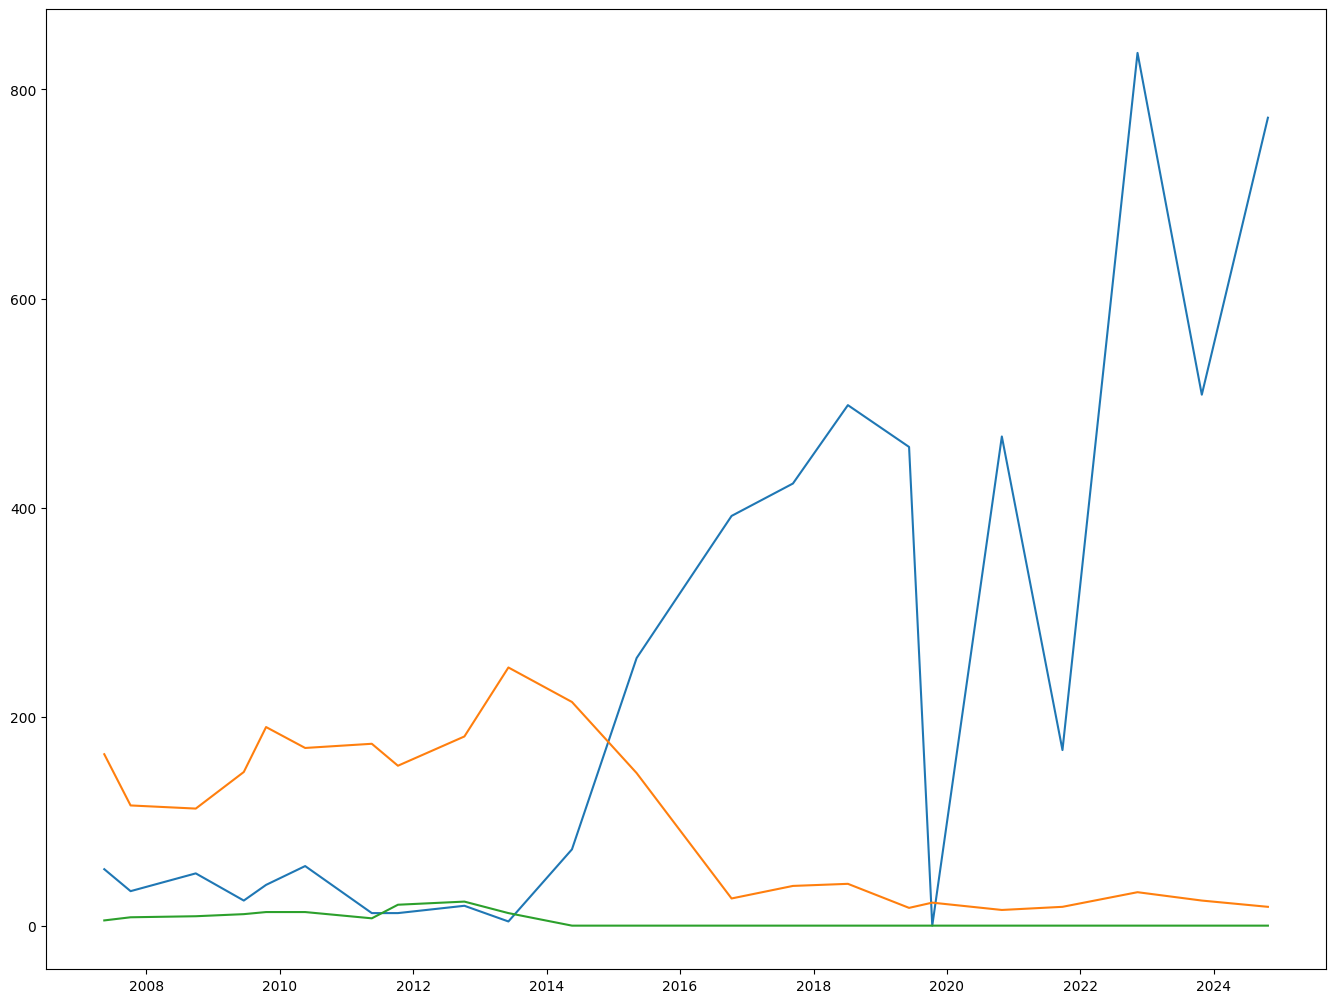

In [21]:
## using matplotlib

figure = plt.figure()
ax = figure.add_axes([0,0,2,2])

ax.plot('Date','Amount',data=purp_urchin_van_damme)
ax.plot('Date','Amount', data = red_abalone_van_damme)
ax.plot('Date','Amount',data= sunflowerstar_van_damme)
plt.show()

In [22]:
## plot ideas: 1) create histogram of species distribution 
## for seastars, urchins, and abalone for sites, subplot by dates
## 2) time series of purple urchins to red abalone in the region for multiple sites
## use subplot
## 3) Ask Dr. J about "time series analysis" and "regime shifts"

In [23]:
ftbrgg_urchabstar = ftbrgg_invert.loc[ftbrgg_invert.Classcode.str.contains(r'purple urchin|red abalone|sunflower star',regex=True, case=False)]
van_damme_urchabstar = van_damme_invert.loc[van_damme_invert.Classcode.str.contains(r'red abalone|purple urchin|sunflower star', regex=True, case=False)]
caspar_urchabstar = caspar_invert.loc[caspar_invert.Classcode.str.contains(r'purple urchin|red abalone|sunflower star',regex=True, case=False)]

In [24]:
display(ftbrgg_urchabstar.head(),van_damme_urchabstar.head(), caspar_urchabstar.head())

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
3758,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Sunflower Star,5,180.0,360.0
3751,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Red Abalone,164,180.0,360.0
3750,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Purple Urchin,54,180.0,360.0
2266,Mendocino Headlands,2007-05-16,2007,May,16,May-16,732812,136,Purple Urchin,43,180.0,360.0
2274,Mendocino Headlands,2007-05-16,2007,May,16,May-16,732812,136,Sunflower Star,10,180.0,360.0


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
3758,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Sunflower Star,5,180.0,360.0
3751,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Red Abalone,164,180.0,360.0
3750,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Purple Urchin,54,180.0,360.0
3778,Van Damme,2007-10-06,2007,Oct,6,Oct-06,732955,279,Purple Urchin,33,180.0,360.0
3779,Van Damme,2007-10-06,2007,Oct,6,Oct-06,732955,279,Red Abalone,115,180.0,360.0


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
694,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Red Abalone,41,180.0,360.0
693,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Purple Urchin,6,180.0,360.0
701,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Sunflower Star,2,180.0,360.0
722,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,Red Abalone,102,180.0,360.0
721,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,Purple Urchin,1,180.0,360.0


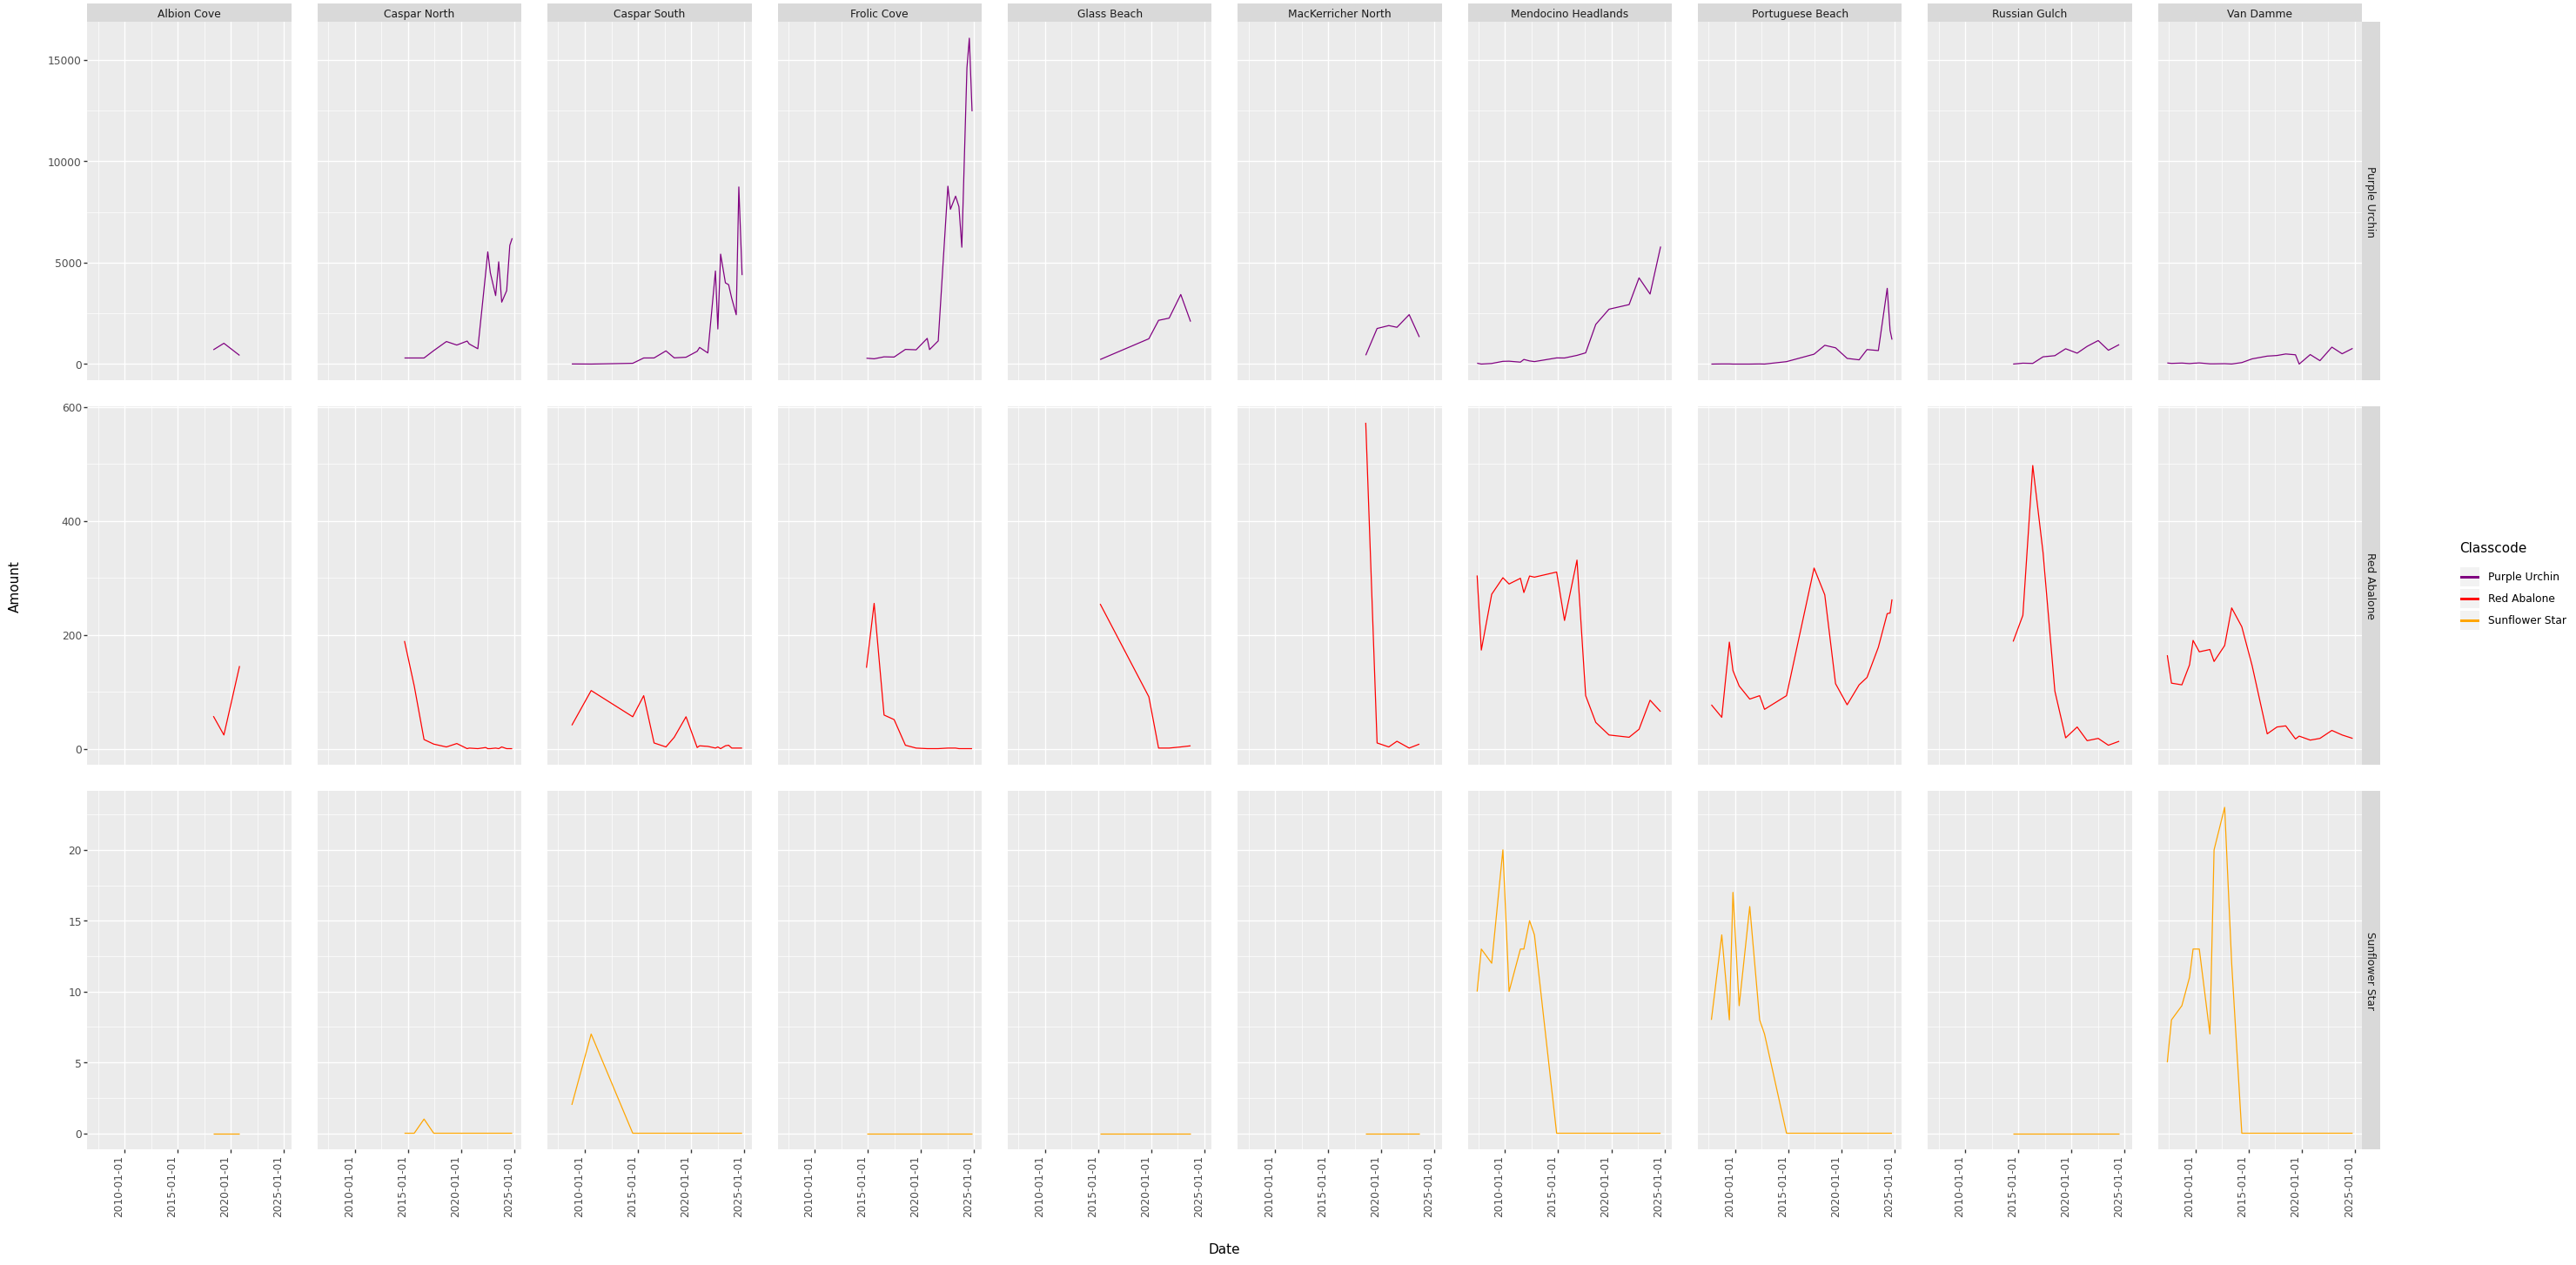

In [25]:
(ggplot(ftbrgg_urchabstar, aes(x='Date',y='Amount',color='Classcode'))
 +geom_line()
 +facet_grid(rows='Classcode',cols='Site', scales='free_y')
+theme(axis_text_x = element_text(angle=90, hjust=1))
+theme(figure_size=(30,15))
+scale_color_manual(['purple','red','orange'])).draw()

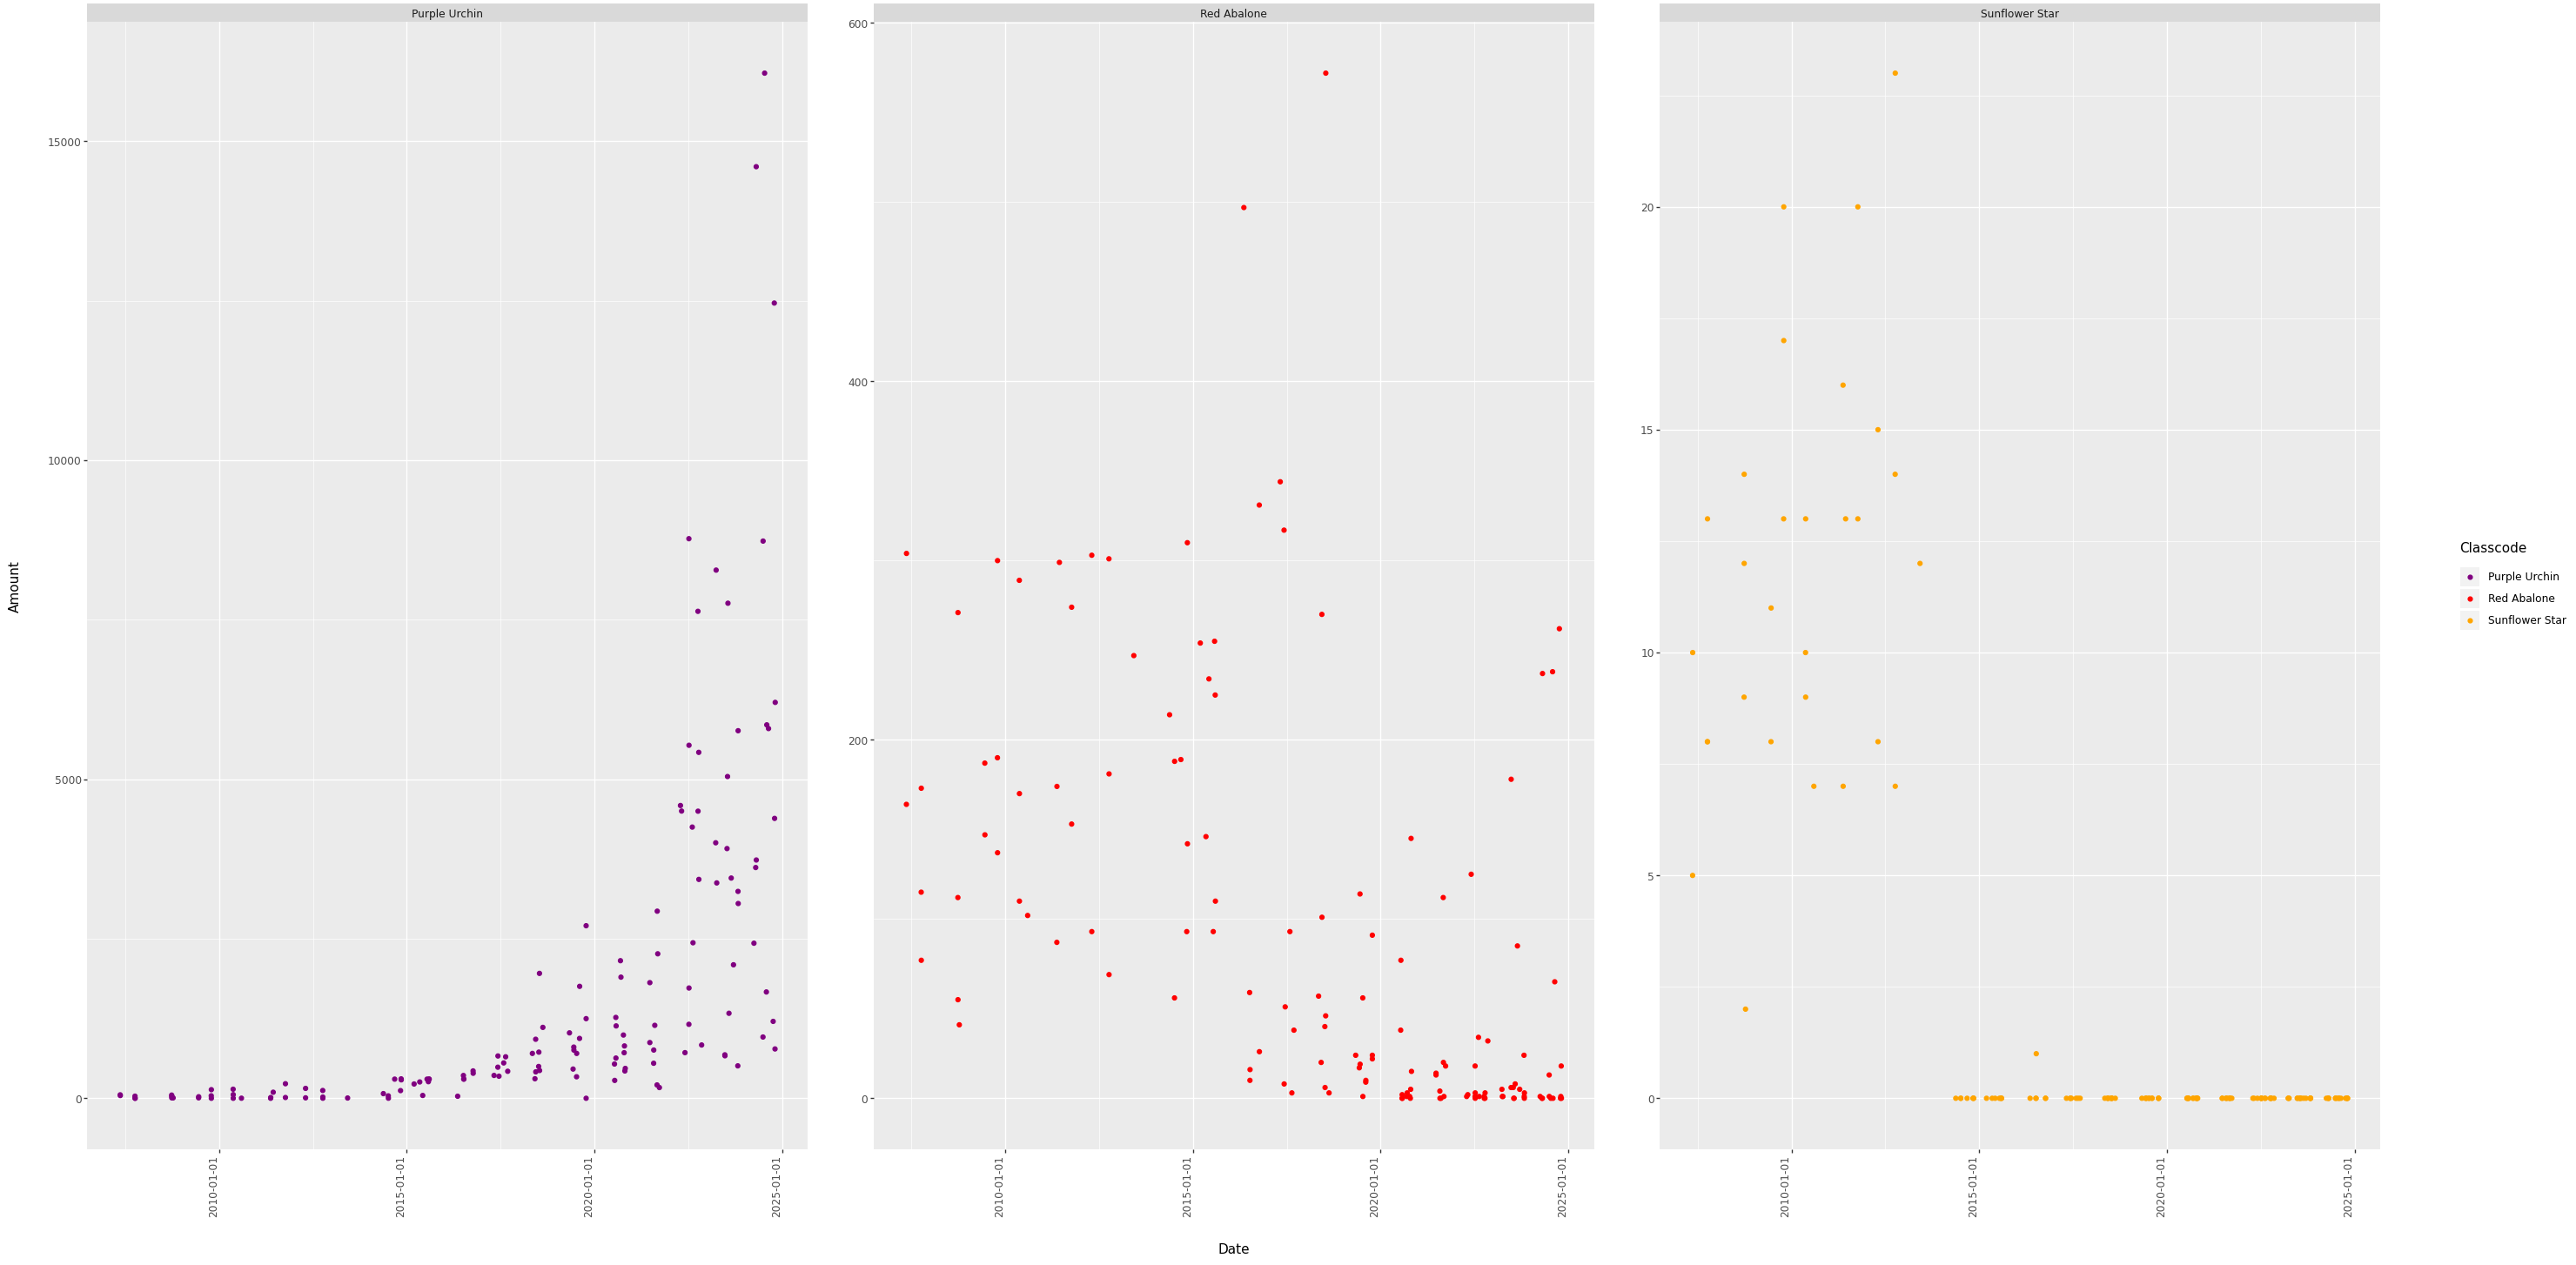

In [26]:
(ggplot(ftbrgg_urchabstar, aes(x='Date',y='Amount',color='Classcode'))
 +geom_point()
 +facet_wrap('Classcode', scales='free_y')
+theme(axis_text_x = element_text(angle=90, hjust=1))
+theme(figure_size=(30,15))
+scale_color_manual(['purple','red','orange'])).draw()

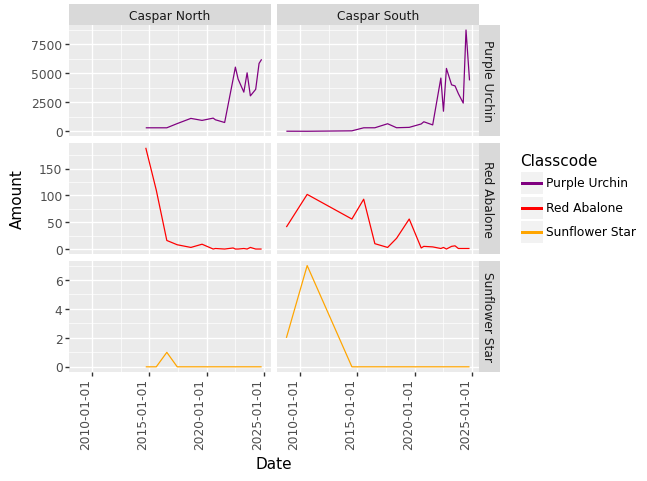

In [27]:
caspar_NS_plot = (ggplot(caspar_urchabstar, aes('Date','Amount',color='Classcode'))
+geom_line()
+facet_grid(rows='Classcode',cols='Site', scales='free_y')
+theme(axis_text_x = element_text(angle=90, hjust=1))
+scale_color_manual(['purple','red','orange'])
).draw()
caspar_NS_plot

In [28]:
## Caspar North only started being surveyed in 2014
caspar_north_urchabstar = caspar_urchabstar.sort_values('Date',ascending=True).loc[caspar_urchabstar.Site.str.contains(r'North',regex=True)]
caspar_south_urchabstar = caspar_urchabstar.sort_values('Date',ascending=True).loc[caspar_urchabstar.Site.str.contains(r'South',regex=True)]

In [29]:
caspar_invert_rcca = ftbrgg_invert_rcca[ftbrgg_invert_rcca.Site.str.contains(r'Caspar',regex=True)]

## this cell takes a while to run
(ggplot(ftbrgg_invert_rcca, aes(x='Longitude',y='Latitude', group='Site'))
+geom_point()
+geom_point(data=caspar_invert_rcca, color='red')
+geom_text(aes(label='Site'),size=6, va='top',ha='left')
 +theme(figure_size=(5,9))).draw()

In [30]:

## frolic cove is the closest site to caspar (#####BUT ONLY GOES BACK TO LATE 2014)
frolic_invert = ftbrgg_invert.loc[ftbrgg_invert.Site.str.contains(r'Frolic',regex=True)]
frolic_urchabstar = frolic_invert[frolic_invert.Classcode.str.contains(r'purple urchin|red abalone|sunflower star',regex=True,case=False)]
display(frolic_invert,frolic_urchabstar)


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
1330,Frolic Cove,2014-11-09,2014,Nov,9,Nov-09,735546,313,Red Abalone,142,171.0,342.0
1314,Frolic Cove,2014-11-09,2014,Nov,9,Nov-09,735546,313,Brown/Golden Gorgonian,0,180.0,360.0
1329,Frolic Cove,2014-11-09,2014,Nov,9,Nov-09,735546,313,Purple Urchin,289,139.0,278.0
1331,Frolic Cove,2014-11-09,2014,Nov,9,Nov-09,735546,313,Red Gorgonian,0,180.0,360.0
1332,Frolic Cove,2014-11-09,2014,Nov,9,Nov-09,735546,313,Red Urchin,225,148.0,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1833,Frolic Cove,2024-10-17,2024,Oct,17,Oct-17,739176,291,Flat Abalone,0,180.0,360.0
1834,Frolic Cove,2024-10-17,2024,Oct,17,Oct-17,739176,291,Giant Keyhole Limpet,0,180.0,360.0
1835,Frolic Cove,2024-10-17,2024,Oct,17,Oct-17,739176,291,Giant Spined Star,0,180.0,360.0
1830,Frolic Cove,2024-10-17,2024,Oct,17,Oct-17,739176,291,California Spiny Lobster,0,180.0,360.0


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
1330,Frolic Cove,2014-11-09,2014,Nov,9,Nov-09,735546,313,Red Abalone,142,171.0,342.0
1329,Frolic Cove,2014-11-09,2014,Nov,9,Nov-09,735546,313,Purple Urchin,289,139.0,278.0
1337,Frolic Cove,2014-11-09,2014,Nov,9,Nov-09,735546,313,Sunflower Star,0,180.0,360.0
1357,Frolic Cove,2015-07-31,2015,Jul,31,Jul-31,735810,212,Purple Urchin,260,126.0,252.0
1358,Frolic Cove,2015-07-31,2015,Jul,31,Jul-31,735810,212,Red Abalone,255,142.0,284.0
1365,Frolic Cove,2015-07-31,2015,Jul,31,Jul-31,735810,212,Sunflower Star,0,180.0,360.0
1393,Frolic Cove,2016-07-06,2016,Jul,6,Jul-06,736151,188,Sunflower Star,0,180.0,360.0
1386,Frolic Cove,2016-07-06,2016,Jul,6,Jul-06,736151,188,Red Abalone,59,180.0,360.0
1385,Frolic Cove,2016-07-06,2016,Jul,6,Jul-06,736151,188,Purple Urchin,357,16.0,32.0
1421,Frolic Cove,2017-06-17,2017,Jun,17,Jun-17,736497,168,Sunflower Star,0,180.0,360.0


In [31]:
#caspar_NS_plot

frolic_plot = (ggplot(frolic_urchabstar, aes('Date','Amount',color='Classcode'))
+geom_line()
+facet_grid(rows='Classcode',cols='Site', scales='free_y')
+theme(axis_text_x = element_text(angle=90, hjust=1))
+scale_color_manual(['purple','red','orange'])
).draw()

In [32]:
#display(caspar_NS_plot, frolic_plot)
##plots are good, but exposes that frolic cove is not a good site to use 
##data does not go back beyond 2010

In [33]:
sites_with_2010 = set([i for i in invert_rcca.Site.unique() if invert_rcca.groupby('Site')['Year'].min()[i]<=2010])
ftbrgg_2010= list(sites_with_2010 & set(ftbrgg_invert.Site.unique()))
### The only sites with data going back to 2010 are the ones belowbrgg
ftbrgg_2010= '|'.join(ftbrgg_2010)
ftbrgg_2010

'Van Damme|Mendocino Headlands|Portuguese Beach|Caspar South'

In [34]:
ftbrgg_2010_df = ftbrgg_invert_rcca[ftbrgg_invert_rcca.Site.str.contains(ftbrgg_2010)]
ftbrgg_2010_df.head()

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Size,Distance,Area_m2,Day,Month,Month_Day,Dateordinal,DayofYear
45717,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Bat Star,50,NaN,25.0,50.0,11,Oct,Oct-11,733326,285
45718,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Black Abalone,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285
45719,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Brown/Golden Gorgonian,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285
45720,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Sea Cucumber,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285
45721,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Spiny Lobster,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285


In [35]:
caspar_N_invert_rcca = caspar_invert_rcca[caspar_invert_rcca.Site.str.contains('Caspar North',regex=True)]
caspar_S_invert_rcca = caspar_invert_rcca[caspar_invert_rcca.Site.str.contains('Caspar South',regex=True)]
caspar_N_invert_rcca.head()

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Size,Distance,Area_m2,Day,Month,Month_Day,Dateordinal,DayofYear
42236,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,Bat Star,50,NaN,12.0,24.0,6,Sep,Sep-06,735482,249
42237,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,Black Abalone,0,NaN,30.0,60.0,6,Sep,Sep-06,735482,249
42238,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,Brown/Golden Gorgonian,0,NaN,30.0,60.0,6,Sep,Sep-06,735482,249
42239,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,California Sea Cucumber,0,NaN,30.0,60.0,6,Sep,Sep-06,735482,249
42240,Caspar North,39.364647,-123.822133,2014,2014-09-06,34.0,1,California Spiny Lobster,0,NaN,30.0,60.0,6,Sep,Sep-06,735482,249


In [36]:
thesites_df = pd.concat([ftbrgg_2010_df, caspar_invert_rcca[caspar_invert_rcca.Site.str.contains('Caspar North',regex=True)]])
thesites_df

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Size,Distance,Area_m2,Day,Month,Month_Day,Dateordinal,DayofYear
45717,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Bat Star,50,NaN,25.0,50.0,11,Oct,Oct-11,733326,285
45718,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Black Abalone,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285
45719,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Brown/Golden Gorgonian,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285
45720,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Sea Cucumber,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285
45721,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Spiny Lobster,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45712,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Starry Urchin,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300
45713,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Sun Star,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300
45714,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Sunflower Star,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300
45715,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Warty Sea Cucumber,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300


## this cell takes a while to run
(ggplot(ftbrgg_2010_df, aes(x='Longitude',y='Latitude', group='Site'))
+geom_point()
+geom_point(data=caspar_invert_rcca, color='red')
+geom_text(aes(label='Site'),size=6, va='top',ha='left')
 +theme(figure_size=(5,9))).draw()

In [37]:
ftbrgg_2010_urchabstar = ftbrgg_2010_df[ftbrgg_2010_df.Classcode.str.contains(r'purple urchin|red abalone|sunflower star',regex=True,case=False)]

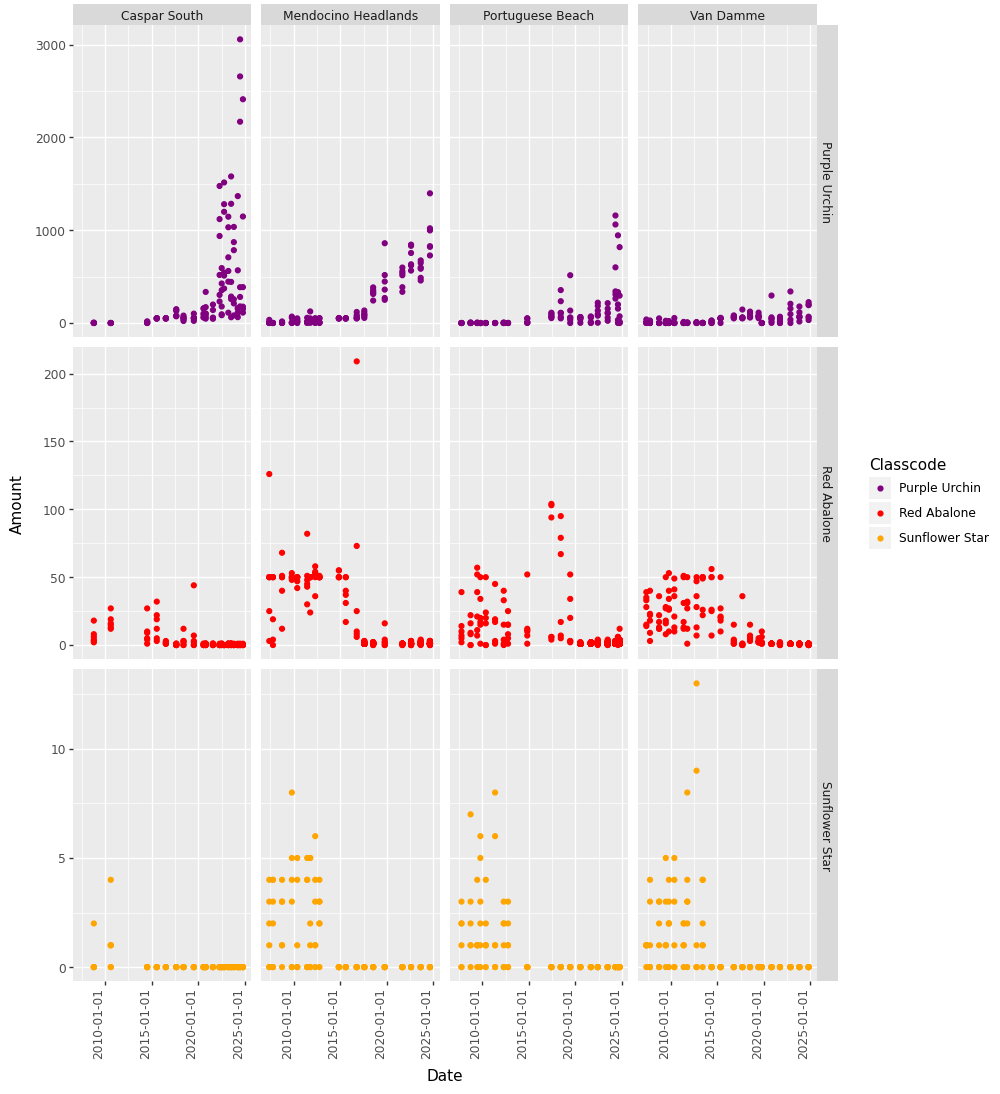

In [38]:
(ggplot(ftbrgg_2010_urchabstar, aes(x='Date',y='Amount',color='Classcode'))
 +geom_point()
 +facet_grid(rows='Classcode',cols='Site', scales='free_y')
+theme(axis_text_x = element_text(angle=90, hjust=1))
+theme(figure_size=(10,11))
+scale_color_manual(['purple','red','orange'])).draw()

_**Next task: Try to Calculate Biodiversity Index Values for Dates**_

## Gini-Simpson's Biodiversity Index
D = 1 - (sum(n(n-1)) / (N(n-1)))


where n = number of individuals of a specific species and N represents the total number of species in the sample. 

1. thesites_df has the data grouped by each site by their Sites,Dates,and Classcodes and get a sum of their Amounts, Size, Distance, and Area_m2
2. For each Site and Date, need to get a total number of individuals. Assign this to "num_indiv_df"
3. Calculate the "(sum(n(n-1)) / (N(n-1)))" portion for each species and assign it to "n_n1_N_N1". Append this as a new column of the same name to theseries_df
4. Group by Site and Date, while Summing n_n1_N_N1. Subtract this from one. Reset the index and assing this to a new dataframe "simpsons_biodiv". Rename the columns to reflect the new values. This is the Simpson Biodiversity Index of that site at that moment in time
5. Plot!

In [39]:
num_indiv_df = thesites_df.groupby(['Site','Date'])['Amount'].sum().reset_index()
num_indiv_df.rename(columns={'Amount':'Total_Count_Site'},inplace=True)
num_indiv_df

,Site,Date,Total_Count_Site
0,Caspar North,2014-09-06,957
1,Caspar North,2015-08-08,921
2,Caspar North,2016-07-10,643
3,Caspar North,2017-06-07,1229
4,Caspar North,2018-08-18,1581
...,...,...,...
93,Van Damme,2020-10-28,979
94,Van Damme,2021-09-25,682
95,Van Damme,2022-11-10,1451
96,Van Damme,2023-10-28,1165


In [40]:
thesites_df = pd.merge(thesites_df, num_indiv_df[['Site', 'Date', 'Total_Count_Site']], on=['Site', 'Date'], how='left')
thesites_df


,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Size,Distance,Area_m2,Day,Month,Month_Day,Dateordinal,DayofYear,Total_Count_Site
0,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Bat Star,50,NaN,25.0,50.0,11,Oct,Oct-11,733326,285,219
1,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Black Abalone,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219
2,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Brown/Golden Gorgonian,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219
3,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Sea Cucumber,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219
4,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Spiny Lobster,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Starry Urchin,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351
19382,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Sun Star,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351
19383,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Sunflower Star,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351
19384,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Warty Sea Cucumber,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351


In [41]:
n_n1_N_N1 = (thesites_df.Amount*(thesites_df.Amount-1)) / (thesites_df.Total_Count_Site*(thesites_df.Total_Count_Site-1))
thesites_df['n_n1_N_N1']=n_n1_N_N1
thesites_df

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Size,Distance,Area_m2,Day,Month,Month_Day,Dateordinal,DayofYear,Total_Count_Site,n_n1_N_N1
0,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Bat Star,50,NaN,25.0,50.0,11,Oct,Oct-11,733326,285,219,0.051317
1,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Black Abalone,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219,0.000000
2,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Brown/Golden Gorgonian,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219,0.000000
3,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Sea Cucumber,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219,0.000000
4,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Spiny Lobster,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Starry Urchin,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351,0.000000
19382,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Sun Star,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351,0.000000
19383,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Sunflower Star,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351,0.000000
19384,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Warty Sea Cucumber,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351,0.000000


In [42]:
simpsons_biodiv = (1- thesites_df.groupby(['Site','Date','Year','Month','Day','Month_Day','Dateordinal','DayofYear'])['n_n1_N_N1'].sum()).reset_index()
simpsons_biodiv.rename(columns={'n_n1_N_N1':"Simpsons_Biodiv_Index"},inplace=True)
simpsons_biodiv

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
0,Caspar North,2014-09-06,2014,Sep,6,Sep-06,735482,249,0.953245
1,Caspar North,2015-08-08,2015,Aug,8,Aug-08,735818,220,0.955804
2,Caspar North,2016-07-10,2016,Jul,10,Jul-10,736155,192,0.929957
3,Caspar North,2017-06-07,2017,Jun,7,Jun-07,736487,158,0.929359
4,Caspar North,2018-08-18,2018,Aug,18,Aug-18,736924,230,0.899369
...,...,...,...,...,...,...,...,...,...
93,Van Damme,2020-10-28,2020,Oct,28,Oct-28,737726,302,0.873818
94,Van Damme,2021-09-25,2021,Sep,25,Sep-25,738058,268,0.927905
95,Van Damme,2022-11-10,2022,Nov,10,Nov-10,738469,314,0.895421
96,Van Damme,2023-10-28,2023,Oct,28,Oct-28,738821,301,0.932599


In [43]:
simpsons_biodiv.describe()

,Date,Year,Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
count,98,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2017-07-01 16:39:11.020408064,2016.908163,14.081633,736511.693878,216.673469,0.902138
min,2007-05-15 00:00:00,2007.000000,1.000000,732811.000000,86.000000,0.692043
25%,2012-06-02 18:00:00,2012.000000,7.000000,734656.750000,160.750000,0.881174
50%,2018-06-23 12:00:00,2018.000000,12.500000,736868.500000,216.000000,0.916835
75%,2022-07-10 00:00:00,2022.000000,19.750000,738346.000000,280.750000,0.939015
max,2024-10-26 00:00:00,2024.000000,31.000000,739185.000000,314.000000,0.961305
std,NaN,5.539152,8.511573,2021.760060,64.387003,0.052788


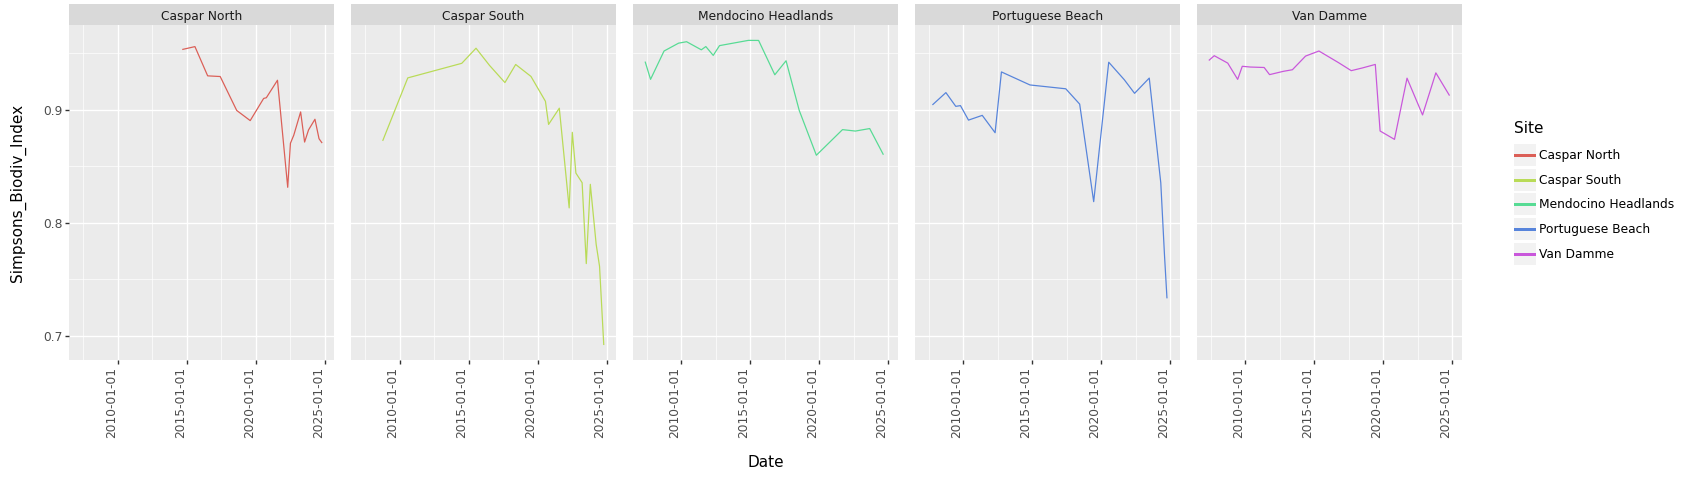

In [44]:
(ggplot(simpsons_biodiv, aes('Date',"Simpsons_Biodiv_Index",color='Site'))
+geom_line()
+theme(axis_text_x = element_text(angle=90, hjust=1))
+facet_wrap('Site', nrow=1)
+theme(figure_size=(17,5))
).draw()


# BIG NOTE: THE CELL BELOW IS FROM: https://github.com/BeatrizArellano/regimeshifts/blob/main/regime_shifts.py 


## I tried importing the module regimeshifts in but it wasn't working so I found this...


Possible issues to work out:


**1. Is it assuming that the system is starting and ending at good dates?**


**2. Does the code assume that the info is evenly spaced out temporally?**


**3. Does it account for natural variance in season?**

import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import robust


class Regime_shift(pd.Series):
    """
    Regime_shift extends the methods of a Pandas Series 
    to implement a regime shift detection index.
    """
    
    def as_detect(self, dt = 1, lwl = 5, hwl = 1/3):
        """
        Estimates the regime shift detection index according to 
        Chris Boulton & Tim Lenton's approach to detect regime shifts.
        
        Original paper:
        https://f1000research.com/articles/8-746
        Original code in R:
        https://github.com/caboulton/asdetect
        
        Parameters
        ----------
        dt: float
            Time step of the time series. 
            Default: 1.
            
        lwl: int            
            Lowest window length to estimate the gradient values.
            Default:5
            
        hwl: int            
            Highest window length to estimate the gradient values.
            Default: 1/3 of the time series
            
        Returns
        -------
        pandas Series
            A series of the same length as the original series containing
            a value in the interval [-1,1] for each element of the series.
            
            This index indicates the proportion of windows that detected 
            a gradient greater than 3 Median Absoulte Deviations of the 
            distribution of gradients.         
        
        """
        l = len(self)
        if isinstance(self, (pd.DataFrame,pd.Series)):
            t = self.index
            ts = self.values  #Just if it's a Panda series
        else:
            t = np.arange(0,l,dt)        
        #Validates highest and lowest window lengths
        if hwl > 1/3 or lwl > hwl*l:
            raise TypeError("Invalid value for highest or lowest window length")    
        
        w_sizes = np.arange(lwl, np.floor(l * hwl)+1, dtype = int) #Windows sizes    
        grad = lambda X,Y: sm.OLS(Y, sm.add_constant(X)).fit().params[1] #Obtains the slope of the linear fitted model for a given set of points (X,Y) in R2    
        grad_rank = np.zeros_like(ts) #Ranking for the detected gradients in the Time series
        
        for ws in w_sizes:
            nw = l // ws #Number of windows
            pad = (l % ws) // 2 # Padding to be left at the extremes (beggining and end) of the time series
            #x= np.array([i*dt for i in range(0,ws)])        
            #Obtains the slope for every window of ws size over the series
            gradients = np.array([grad(t[ws*i + pad: ws*(i+1) + pad], ts[ws*i + pad: ws*(i+1) + pad]) for i in range(0,nw)])
            #Finding the absolute distances from the median bigger than 3 MADs        
            outliers = np.where(np.abs(gradients - np.median(gradients)) > 3 * robust.mad(gradients))[0]       
            for o in outliers:            
                grad_rank[o*ws+pad:o*ws+ws+pad] +=  (1/len(w_sizes))*((1,-1)[int(gradients[o]- np.median(gradients) < 0)]) ## Adds +-1/(# of windows) to the ranking of gradients
        
        return pd.Series(data = grad_rank, index = t)  
    
    def before_rs(self):
        """
        Returns the part of the timeseries before the regime shift
        """
        rs_time = self.as_detect().idxmax()
        return self.iloc[:rs_time]
    
def sample_rs(length=999,transition_timing=0.9,std = 0.1):
    """
    sample_rs generates a sample time series with an underlying bifurcation

    Parameters
    ----------
    length : integer, optional
        Length of the time-series. The default is 999.
    transition_timing : float [0,1], optional
        Timing of the regime shift. The default is 0.9.
    std : float, optional
        standard deviation. The default is 0.1.

    Returns
    -------
    Pandas Series
        Time-series of a process approaching a tipping point.

    """
    mu = (2/9)*math.sqrt(3)     #Bifurcation parameter
    t = np.arange(0,length,1)   #Time steps
    m = mu*t / np.floor(length*transition_timing)          #The change in the bifurcation parameter over time (this is the length of t compared to mu which is a single value)    
    a = np.full(len(t)+1,np.nan)    #setting up vector to hold created time series
    a[0] = -1                 #start it in the left well
    for i,e in enumerate(m):    
        a[i+1] = a[i] + (1/2)*((-a[i]**3) + a[i] + e) + std * np.random.normal() #uses forward euler to run the model over times          
    return Regime_shift(pd.Series(a))
      
    

In [45]:
simpsons_biodiv

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
0,Caspar North,2014-09-06,2014,Sep,6,Sep-06,735482,249,0.953245
1,Caspar North,2015-08-08,2015,Aug,8,Aug-08,735818,220,0.955804
2,Caspar North,2016-07-10,2016,Jul,10,Jul-10,736155,192,0.929957
3,Caspar North,2017-06-07,2017,Jun,7,Jun-07,736487,158,0.929359
4,Caspar North,2018-08-18,2018,Aug,18,Aug-18,736924,230,0.899369
...,...,...,...,...,...,...,...,...,...
93,Van Damme,2020-10-28,2020,Oct,28,Oct-28,737726,302,0.873818
94,Van Damme,2021-09-25,2021,Sep,25,Sep-25,738058,268,0.927905
95,Van Damme,2022-11-10,2022,Nov,10,Nov-10,738469,314,0.895421
96,Van Damme,2023-10-28,2023,Oct,28,Oct-28,738821,301,0.932599


In [46]:
caspar_simpsons = simpsons_biodiv[simpsons_biodiv.Site.str.contains(r'Caspar', regex=True)].sort_values('Date')
#caspar_simpsons['regime_shift']= Regime_shift(caspar_simpsons.Simpsons_Biodiv_Index).as_detect()

In [47]:
#caspar_rs = Regime_shift(simpsons_biodiv[simpsons_biodiv.Site.str.contains(r'Caspar', regex=True)].Simpsons_Biodiv_Index).as_detect()
caspar_simpsons.head(5)

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
18,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,0.872481
19,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,0.928151
20,Caspar South,2014-07-06,2014,Jul,6,Jul-06,735420,187,0.941034
0,Caspar North,2014-09-06,2014,Sep,6,Sep-06,735482,249,0.953245
21,Caspar South,2015-07-18,2015,Jul,18,Jul-18,735797,199,0.954376


In [48]:
#plt.plot(caspar_rs)

In [49]:
#(ggplot(caspar_simpsons, aes('Date','regime_shift'))
# +geom_line()).draw()

In [50]:
## Im not too sure this will work out for this site

In [51]:
#caspar_simpsons = caspar_simpsons.drop('regime_shift', axis=1)
caspar_simpsons.sort_values('Date')
caspar_simpsons.Site.value_counts()

Site
Caspar South    20
Caspar North    18
Name: count, dtype: int64

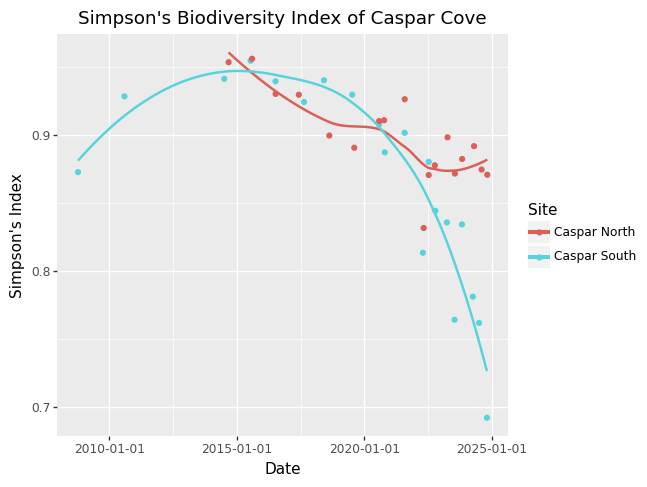

In [52]:
(ggplot(caspar_simpsons, aes('Date','Simpsons_Biodiv_Index',color='Site'))
+geom_point()
+ggtitle("Simpson's Biodiversity Index of Caspar Cove")
+scale_y_continuous(name="Simpson's Index")
+stat_smooth(method='loess', se=False)).draw()

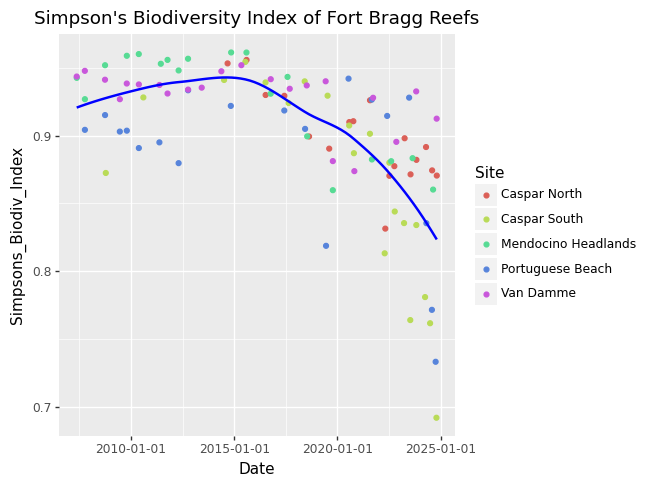

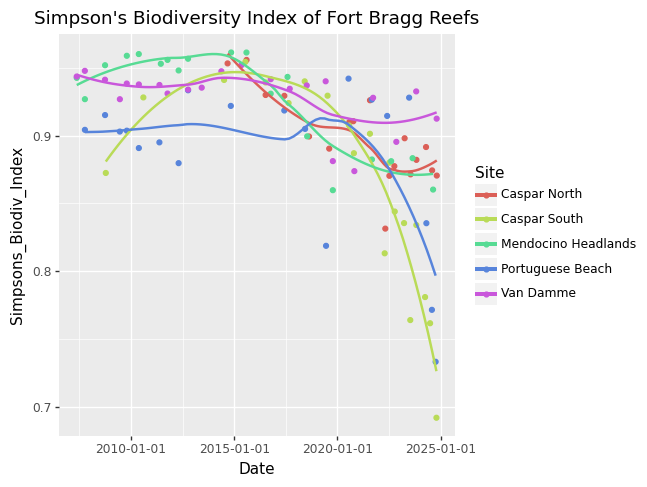

In [53]:
## shows the whole regions shift
display((ggplot(simpsons_biodiv, aes('Date','Simpsons_Biodiv_Index'))
 +geom_point(aes( color='Site'))
+ggtitle("Simpson's Biodiversity Index of Fort Bragg Reefs")
 +stat_smooth(method='loess', se=False, color='blue')).draw()),
(ggplot(simpsons_biodiv, aes('Date','Simpsons_Biodiv_Index',color='Site'))
 +geom_point()
 +ggtitle("Simpson's Biodiversity Index of Fort Bragg Reefs")
 +stat_smooth(method='loess', se=False)).draw()

# Next Approach!
## Standardizing the indices

In [54]:
## create function to standardize indices for each site

In [55]:
## create function to standardize indices for each site

## does not alter the original data frame
## returns a COPY of the orginal dataframe if the column is already present
def standardize(dataframe,column):
    dataframe1 = dataframe.copy()
    standardized = (dataframe1[column] - dataframe1[column].mean())/dataframe1[column].std()
    column_name = 'std_'+column
    if column_name not in dataframe.columns:
        dataframe1[column_name] = standardized
        return dataframe1
    else:
        return dataframe1

In [56]:
caspar_std_simpsons = standardize(caspar_simpsons,'Simpsons_Biodiv_Index')
caspar_std_simpsons.head()

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index,std_Simpsons_Biodiv_Index
18,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,0.872481,-0.154470
19,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,0.928151,0.783667
20,Caspar South,2014-07-06,2014,Jul,6,Jul-06,735420,187,0.941034,1.000776
0,Caspar North,2014-09-06,2014,Sep,6,Sep-06,735482,249,0.953245,1.206545
21,Caspar South,2015-07-18,2015,Jul,18,Jul-18,735797,199,0.954376,1.225612


In [57]:
std_simpsons_biodiv = standardize(simpsons_biodiv, 'Simpsons_Biodiv_Index')
std_simpsons_biodiv

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index,std_Simpsons_Biodiv_Index
0,Caspar North,2014-09-06,2014,Sep,6,Sep-06,735482,249,0.953245,0.968154
1,Caspar North,2015-08-08,2015,Aug,8,Aug-08,735818,220,0.955804,1.016639
2,Caspar North,2016-07-10,2016,Jul,10,Jul-10,736155,192,0.929957,0.527001
3,Caspar North,2017-06-07,2017,Jun,7,Jun-07,736487,158,0.929359,0.515668
4,Caspar North,2018-08-18,2018,Aug,18,Aug-18,736924,230,0.899369,-0.052460
...,...,...,...,...,...,...,...,...,...,...
93,Van Damme,2020-10-28,2020,Oct,28,Oct-28,737726,302,0.873818,-0.536487
94,Van Damme,2021-09-25,2021,Sep,25,Sep-25,738058,268,0.927905,0.488118
95,Van Damme,2022-11-10,2022,Nov,10,Nov-10,738469,314,0.895421,-0.127261
96,Van Damme,2023-10-28,2023,Oct,28,Oct-28,738821,301,0.932599,0.577040


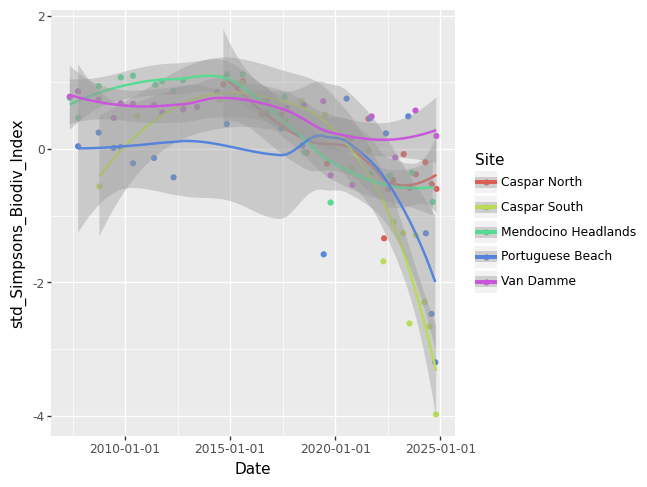

In [58]:
## shows the whole regions shift
(ggplot(std_simpsons_biodiv, aes('Date','std_Simpsons_Biodiv_Index', color='Site'))
 +geom_point()
 +stat_smooth()).draw()

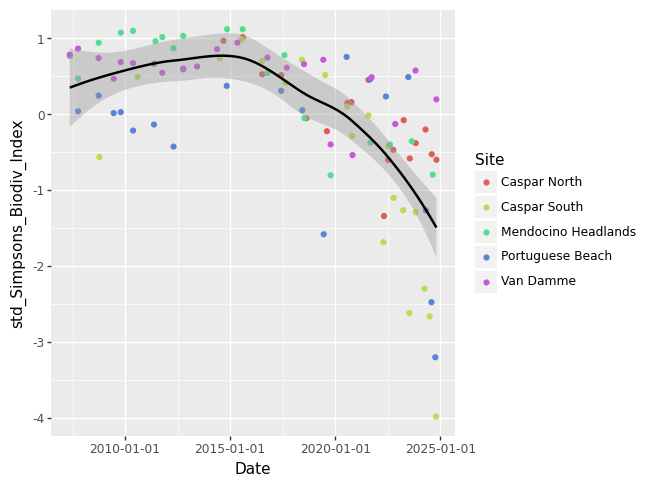

In [59]:
## shows the whole regions shift
(ggplot(std_simpsons_biodiv, aes('Date','std_Simpsons_Biodiv_Index'))
 +geom_point(aes( color='Site'))
 +stat_smooth()).draw()

In [60]:
caspar_simpsons.head()

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
18,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,0.872481
19,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,0.928151
20,Caspar South,2014-07-06,2014,Jul,6,Jul-06,735420,187,0.941034
0,Caspar North,2014-09-06,2014,Sep,6,Sep-06,735482,249,0.953245
21,Caspar South,2015-07-18,2015,Jul,18,Jul-18,735797,199,0.954376


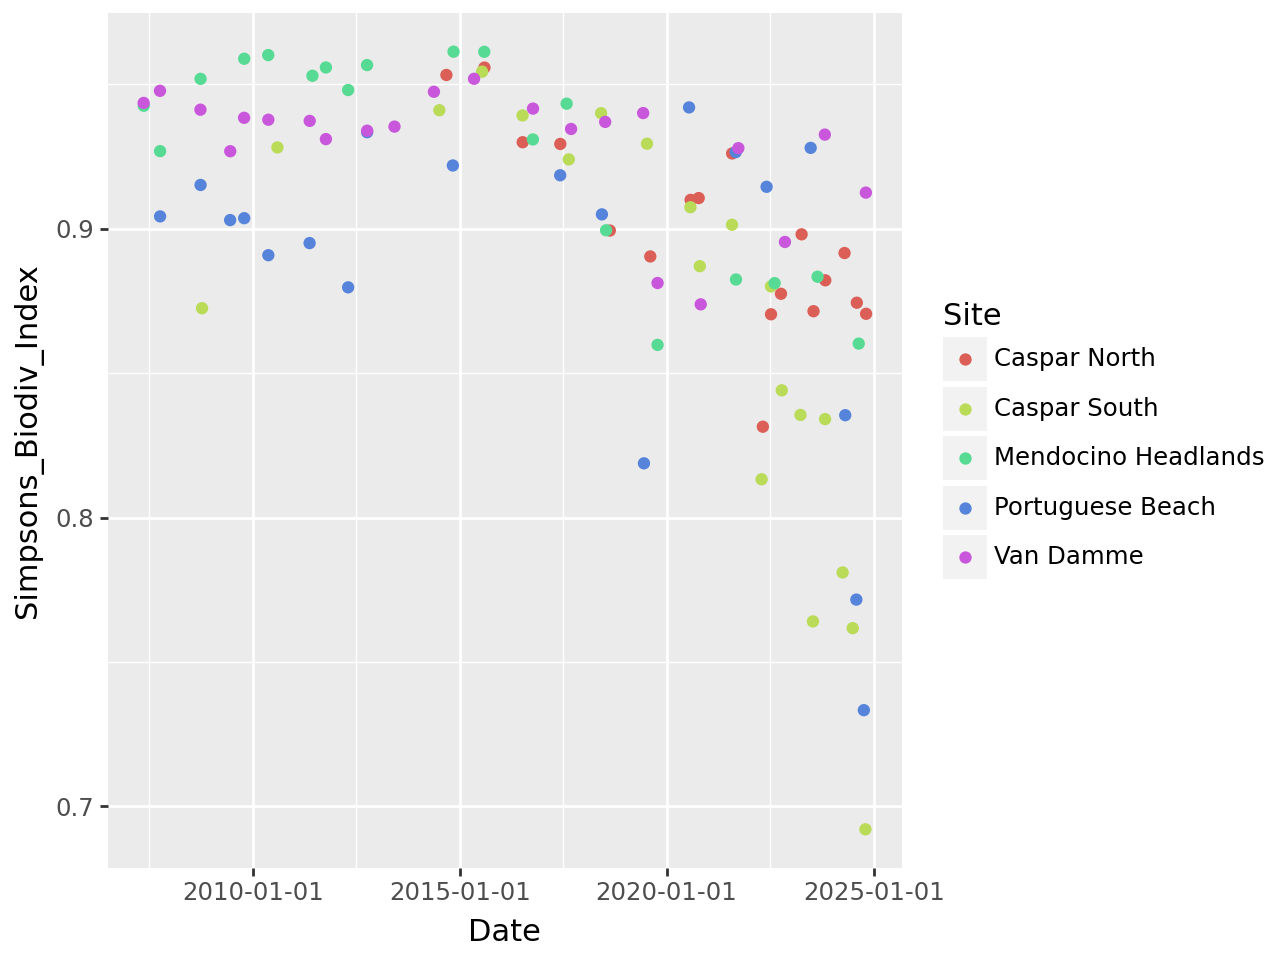

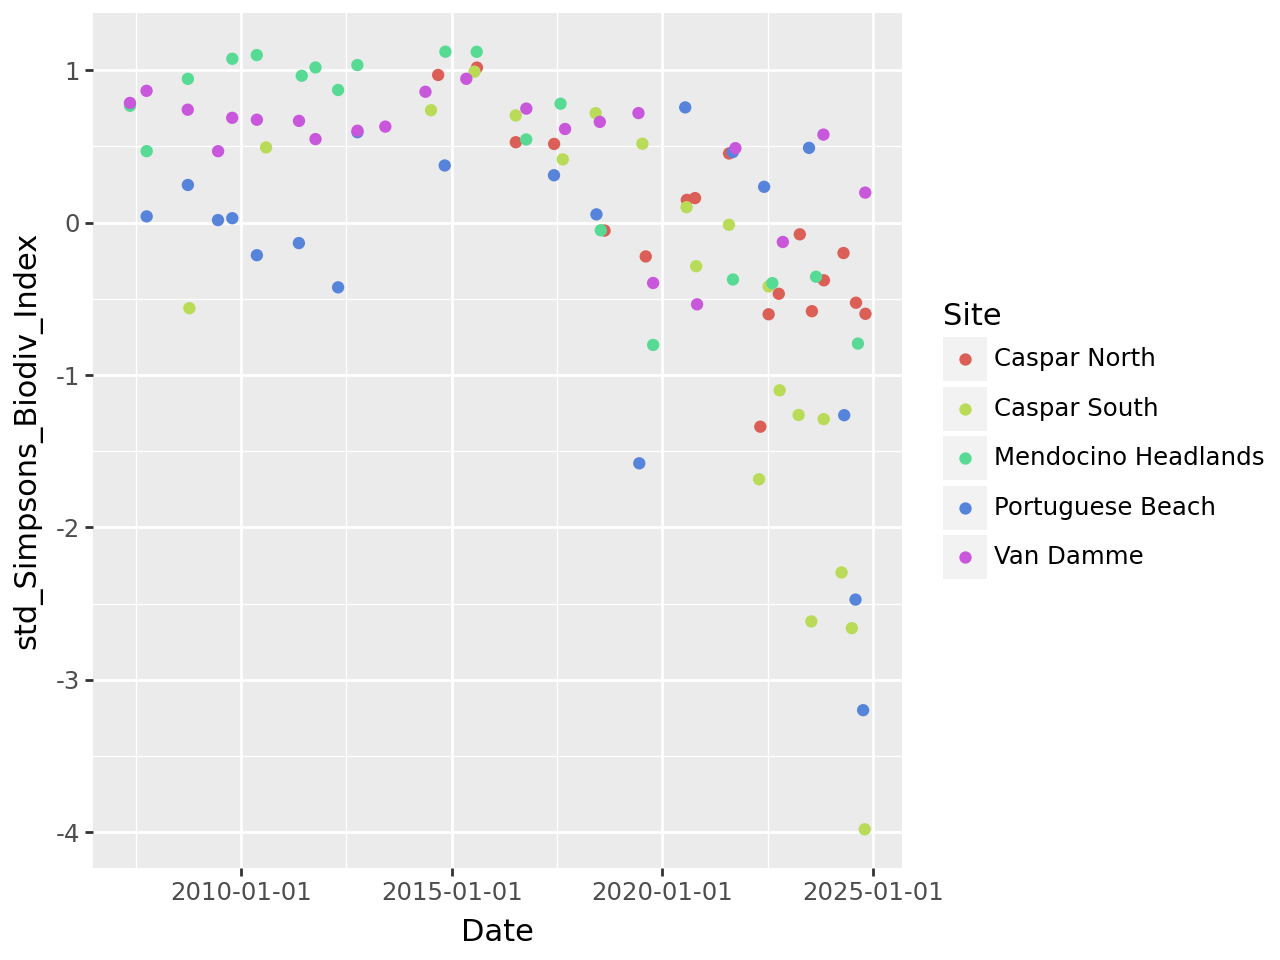

In [61]:
display(ggplot(std_simpsons_biodiv, aes('Date','Simpsons_Biodiv_Index',color='Site'))+geom_point(),
ggplot(std_simpsons_biodiv, aes('Date','std_Simpsons_Biodiv_Index',color='Site'))+geom_point())

In [62]:
## does standardizing the data even do anything in this case?
caspar_urchabstar

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
694,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Red Abalone,41,180.0,360.0
693,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Purple Urchin,6,180.0,360.0
701,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Sunflower Star,2,180.0,360.0
722,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,Red Abalone,102,180.0,360.0
721,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,Purple Urchin,1,180.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,Caspar South,2024-10-20,2024,Oct,20,Oct-20,739179,294,Red Abalone,1,180.0,360.0
1299,Caspar South,2024-10-20,2024,Oct,20,Oct-20,739179,294,Purple Urchin,4386,180.0,360.0
673,Caspar North,2024-10-26,2024,Oct,26,Oct-26,739185,300,Sunflower Star,0,180.0,360.0
664,Caspar North,2024-10-26,2024,Oct,26,Oct-26,739185,300,Red Abalone,0,180.0,360.0


# Next Steps: Calculate Proportions of Animals

In [63]:
thesites_df

,Site,Latitude,Longitude,Year,Date,Depth_ft,Transect,Classcode,Amount,Size,Distance,Area_m2,Day,Month,Month_Day,Dateordinal,DayofYear,Total_Count_Site,n_n1_N_N1
0,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Bat Star,50,NaN,25.0,50.0,11,Oct,Oct-11,733326,285,219,0.051317
1,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Black Abalone,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219,0.000000
2,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,Brown/Golden Gorgonian,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219,0.000000
3,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Sea Cucumber,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219,0.000000
4,Caspar South,39.361729,-123.822449,2008,2008-10-11,16.5,1,California Spiny Lobster,0,NaN,30.0,60.0,11,Oct,Oct-11,733326,285,219,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Starry Urchin,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351,0.000000
19382,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Sun Star,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351,0.000000
19383,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Sunflower Star,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351,0.000000
19384,Caspar North,39.364647,-123.822133,2024,2024-10-26,33.0,6,Warty Sea Cucumber,0,NaN,30.0,60.0,26,Oct,Oct-26,739185,300,7351,0.000000


In [64]:
## JUST HAD LECTURE MONDAY MARCH 10TH
## sns maps
## df below inlcudes only caspar south data on purple urchins, red abalones, and sunflowerstars
caspar_south_urchabstar.head()

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
694,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Red Abalone,41,180.0,360.0
693,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Purple Urchin,6,180.0,360.0
701,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Sunflower Star,2,180.0,360.0
722,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,Red Abalone,102,180.0,360.0
721,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,Purple Urchin,1,180.0,360.0


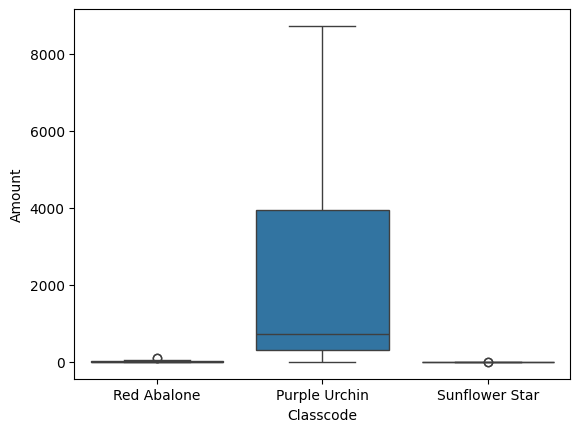

In [65]:
sns.boxplot(data=caspar_south_urchabstar, x='Classcode', y='Amount')
plt.show()

sns.catplot(data=caspar_south_urchabstar,x='Classcode', y='Amount', col = 'Date',col_wrap=4,kind='box', height=4)


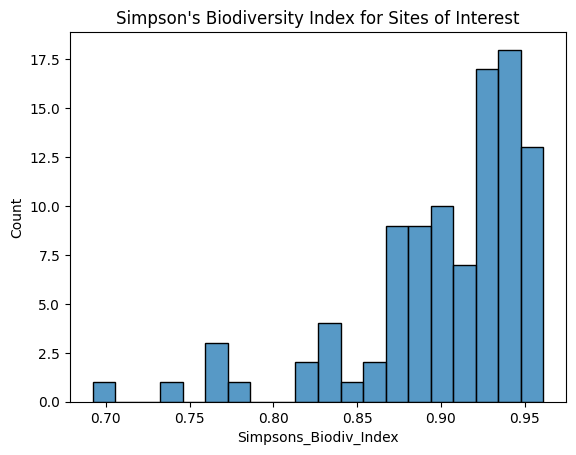

In [66]:
sns.histplot(data=simpsons_biodiv,x='Simpsons_Biodiv_Index', bins=20)
plt.title("Simpson's Biodiversity Index for Sites of Interest")
plt.show()

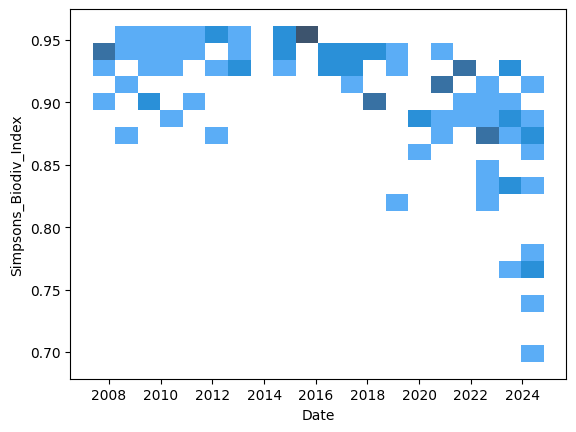

In [67]:
sns.histplot(data=simpsons_biodiv,x='Date',y='Simpsons_Biodiv_Index', bins=20)
plt.show()

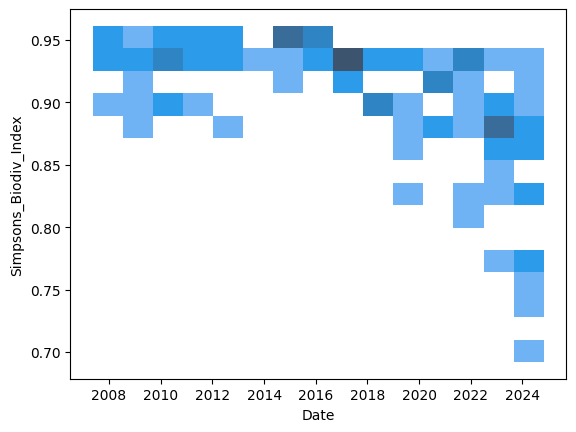

In [68]:
sns.histplot(data=simpsons_biodiv,x='Date',y='Simpsons_Biodiv_Index',multiple='stack',bins=15)
plt.show()

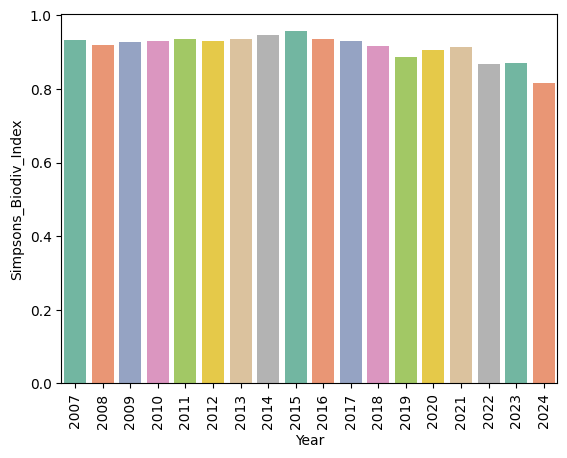

In [69]:
sns.barplot(data=simpsons_biodiv,x='Year',y='Simpsons_Biodiv_Index',errorbar=None,palette='Set2',estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

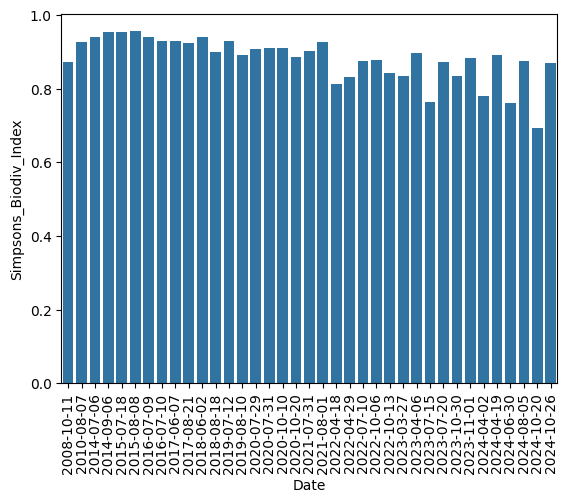

In [70]:
sns.barplot(data=caspar_simpsons,x='Date',y='Simpsons_Biodiv_Index',errorbar=None,estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

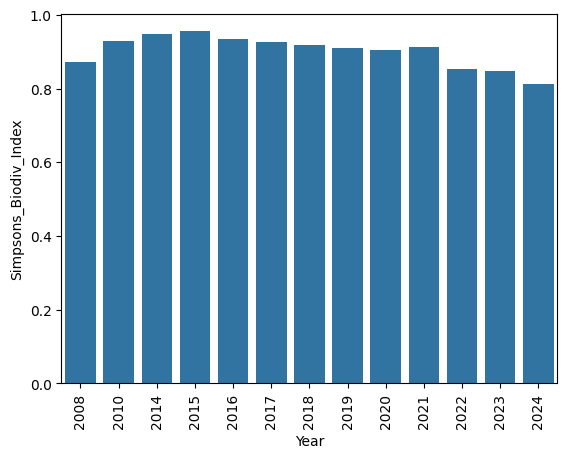

In [71]:
sns.barplot(data=caspar_simpsons,x='Year',y='Simpsons_Biodiv_Index',errorbar=None,estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

In [72]:
simpsons_biodiv_mean = simpsons_biodiv.groupby(['Site','Date','Year','Month','Day','Month_Day','Dateordinal','DayofYear'])['Simpsons_Biodiv_Index'].mean().reset_index()
simpsons_biodiv_mean

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
0,Caspar North,2014-09-06,2014,Sep,6,Sep-06,735482,249,0.953245
1,Caspar North,2015-08-08,2015,Aug,8,Aug-08,735818,220,0.955804
2,Caspar North,2016-07-10,2016,Jul,10,Jul-10,736155,192,0.929957
3,Caspar North,2017-06-07,2017,Jun,7,Jun-07,736487,158,0.929359
4,Caspar North,2018-08-18,2018,Aug,18,Aug-18,736924,230,0.899369
...,...,...,...,...,...,...,...,...,...
93,Van Damme,2020-10-28,2020,Oct,28,Oct-28,737726,302,0.873818
94,Van Damme,2021-09-25,2021,Sep,25,Sep-25,738058,268,0.927905
95,Van Damme,2022-11-10,2022,Nov,10,Nov-10,738469,314,0.895421
96,Van Damme,2023-10-28,2023,Oct,28,Oct-28,738821,301,0.932599


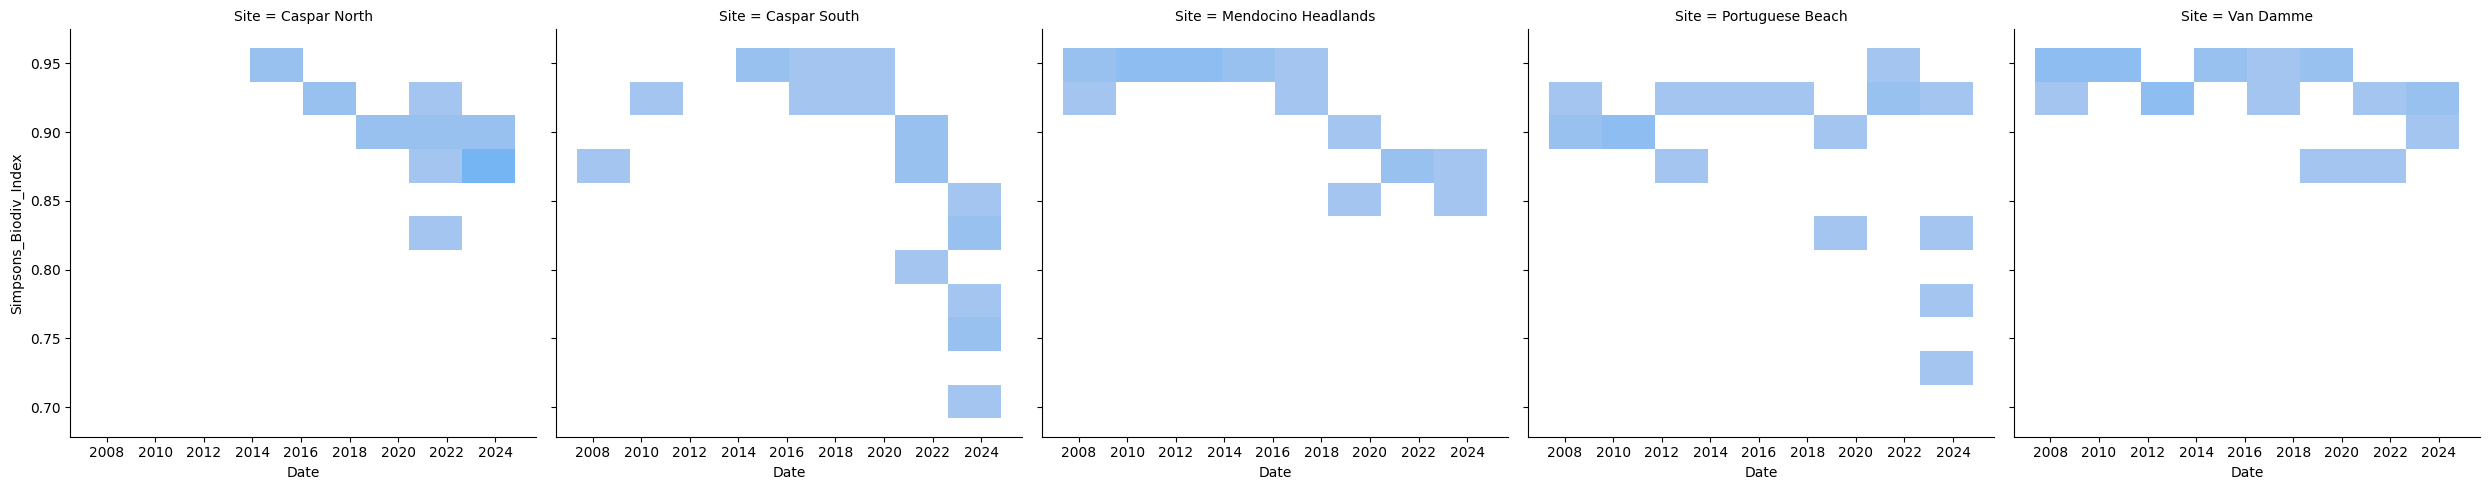

In [73]:
sns.displot(data=simpsons_biodiv,x='Date',y='Simpsons_Biodiv_Index',col='Site', stat='proportion')
plt.show()

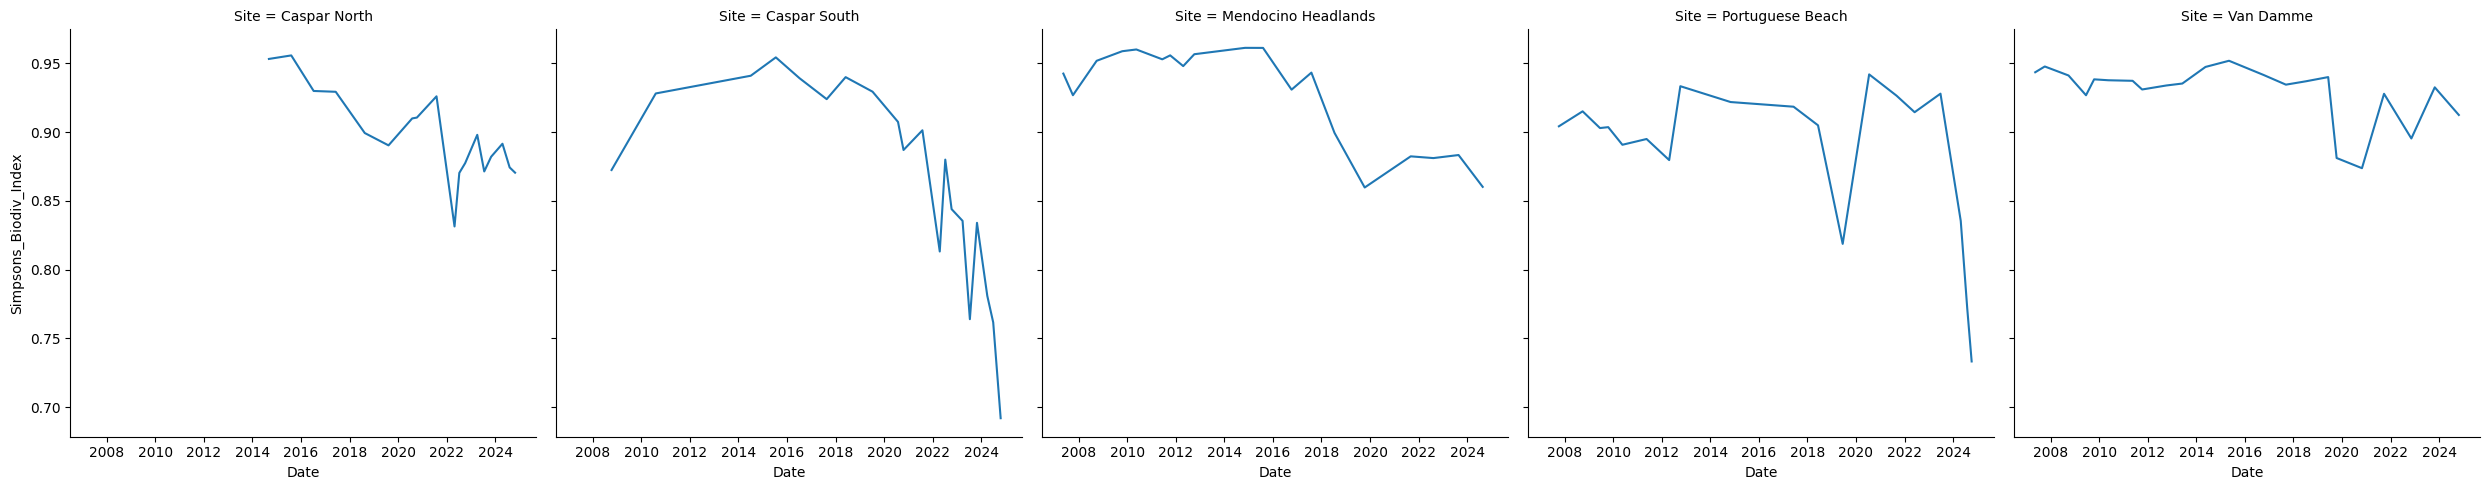

In [74]:
sns.relplot(data=simpsons_biodiv_mean, x='Date', y='Simpsons_Biodiv_Index', col='Site', kind='line')
plt.show()

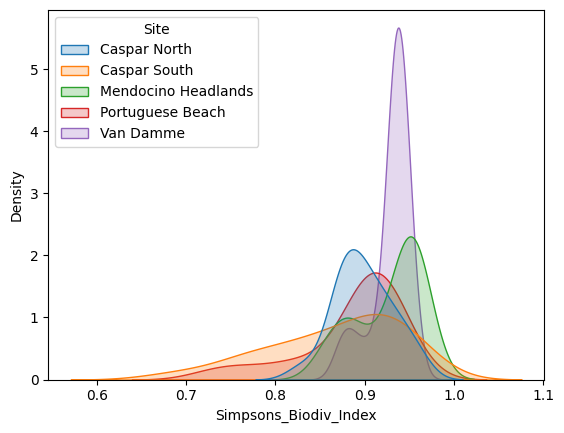

In [75]:
sns.kdeplot(data=simpsons_biodiv, x='Simpsons_Biodiv_Index', hue='Site', fill=True)
plt.show()

# Start comparing averages

### Year to Year 

In [76]:
simpsons_biodiv.isna().sum()

Site                     0
Date                     0
Year                     0
Month                    0
Day                      0
Month_Day                0
Dateordinal              0
DayofYear                0
Simpsons_Biodiv_Index    0
dtype: int64

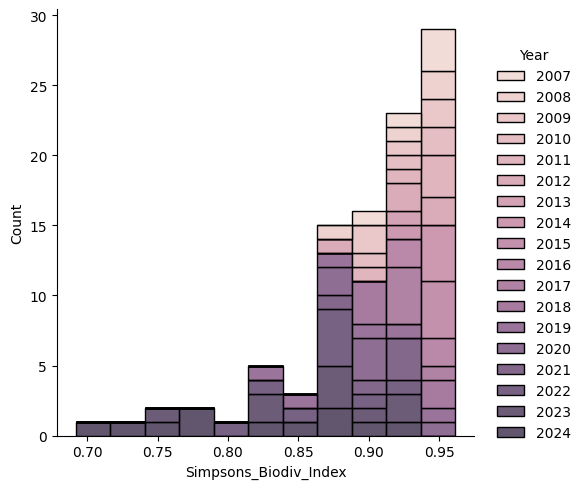

In [77]:
sns.displot(data=simpsons_biodiv, x='Simpsons_Biodiv_Index', hue='Year',fill=True, multiple='stack')
plt.show()

In [78]:
pre_2013_simpsdiv = simpsons_biodiv[simpsons_biodiv.Year<2013]
pre_2013_caspardiv = pre_2013_simpsdiv[pre_2013_simpsdiv.Site.str.contains('Caspar')]
display(pre_2013_simpsdiv.head(),pre_2013_caspardiv.head())


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
18,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,0.872481
19,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,0.928151
38,Mendocino Headlands,2007-05-16,2007,May,16,May-16,732812,136,0.942588
39,Mendocino Headlands,2007-10-07,2007,Oct,7,Oct-07,732956,280,0.926869
40,Mendocino Headlands,2008-09-28,2008,Sep,28,Sep-28,733313,272,0.951895


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
18,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,0.872481
19,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,0.928151


In [79]:
##going to use regional data to diplay, as there is not much to show pre-2013 for Caspar

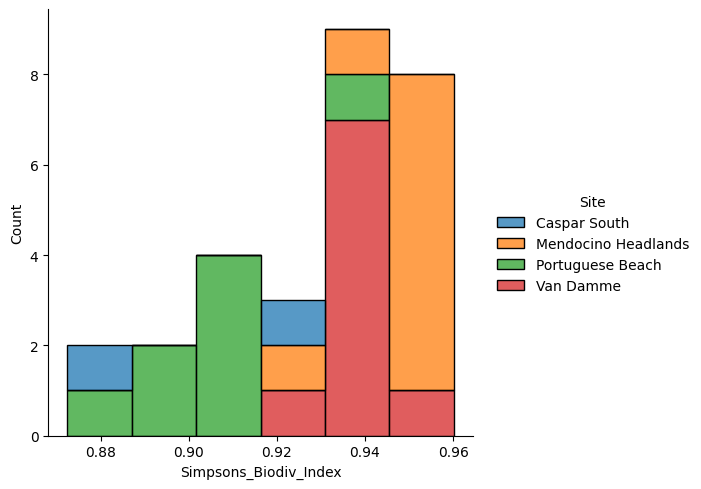

In [80]:
sns.displot(data=pre_2013_simpsdiv, x='Simpsons_Biodiv_Index', hue='Site',fill=True, multiple='stack')
plt.show()

In [81]:
post_2018_simpsdiv = simpsons_biodiv[simpsons_biodiv.Year>2018]
post_2018_caspardiv = post_2018_simpsdiv[post_2018_simpsdiv.Site.str.contains('Caspar')]
display(post_2018_simpsdiv.head(),post_2018_caspardiv.head())

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
5,Caspar North,2019-08-10,2019,Aug,10,Aug-10,737281,222,0.890406
6,Caspar North,2020-07-31,2020,Jul,31,Jul-31,737637,213,0.909994
7,Caspar North,2020-10-10,2020,Oct,10,Oct-10,737708,284,0.910617
8,Caspar North,2021-08-01,2021,Aug,1,Aug-01,738003,213,0.926065
9,Caspar North,2022-04-29,2022,Apr,29,Apr-29,738274,119,0.831452


,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Simpsons_Biodiv_Index
5,Caspar North,2019-08-10,2019,Aug,10,Aug-10,737281,222,0.890406
6,Caspar North,2020-07-31,2020,Jul,31,Jul-31,737637,213,0.909994
7,Caspar North,2020-10-10,2020,Oct,10,Oct-10,737708,284,0.910617
8,Caspar North,2021-08-01,2021,Aug,1,Aug-01,738003,213,0.926065
9,Caspar North,2022-04-29,2022,Apr,29,Apr-29,738274,119,0.831452


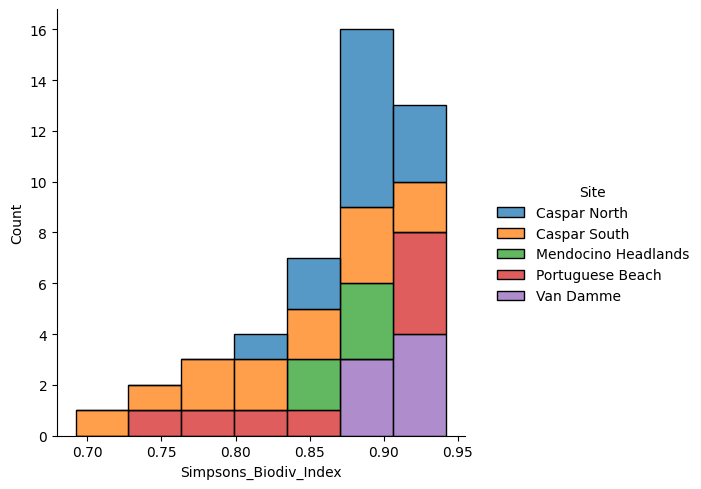

In [82]:
sns.displot(data=post_2018_simpsdiv, x='Simpsons_Biodiv_Index', hue='Site',fill=True, multiple='stack')
plt.show()

<mark style="background-color: lightblue">After working through Kelp and SciDiv Data, portuguese beach has a very different kelp distribution and ecosystem than Caspar, although the invert_biodiversity parameters are similar. Therefore, the cell below will not be used for estimating the diffence in means for Caspar. Van Damme will be excluded from post_2018_simpsdiv to estimate. </mark>

In [83]:
##use caspar south and portgueese beach for pre2010 estimate for caspar like ecosystems
pre_caspport_simpsdiv = pre_2013_simpsdiv[pre_2013_simpsdiv.Site.str.contains('Caspar|Portuguese',regex=True)]
post_caspport_simpsdiv = post_2018_simpsdiv[post_2018_simpsdiv.Site.str.contains('Caspar|Portuguese',regex=True)]



In [84]:
pre_2013_simpsdiv.Simpsons_Biodiv_Index.mean(), pre_2013_simpsdiv.Simpsons_Biodiv_Index.std()

(0.9291938817124813, 0.0246110161818689)

In [85]:

print("Pre-2013 Mean and StdDev of Simpson's Diversity Index for Caspar and Surrounding Reefs: \n\n",
      pre_2013_simpsdiv.Simpsons_Biodiv_Index.mean(), 
      pre_2013_simpsdiv.Simpsons_Biodiv_Index.std(),'\n\n'
      "Post-2018 Mean and StdDev of Simpson's Diversity Index for Caspar and Surrounding Reefs: \n\n",
      post_2018_simpsdiv.Simpsons_Biodiv_Index.mean(),
      post_2018_simpsdiv.Simpsons_Biodiv_Index.std())

Pre-2013 Mean and StdDev of Simpson's Diversity Index for Caspar and Surrounding Reefs: 

 0.9291938817124813 0.0246110161818689 

Post-2018 Mean and StdDev of Simpson's Diversity Index for Caspar and Surrounding Reefs: 

 0.8681792161395074 0.056999558066048936


In [86]:
print("Pre-2016 Mean and StdDev of Simpson's Diversity Index for Caspar and Surrounding Reefs:",'\n\n',
      simpsons_biodiv[simpsons_biodiv.Year<2016].Simpsons_Biodiv_Index.mean(), 
      simpsons_biodiv[simpsons_biodiv.Year<2016].Simpsons_Biodiv_Index.std(),'\n\n'
      "Post-2022 Mean and StdDev of Simpson's Diversity Index for Caspar and Surrounding Reefs:",'\n\n',
      simpsons_biodiv[simpsons_biodiv.Year>2022].Simpsons_Biodiv_Index.mean(),
      simpsons_biodiv[simpsons_biodiv.Year>2022].Simpsons_Biodiv_Index.std())

Pre-2016 Mean and StdDev of Simpson's Diversity Index for Caspar and Surrounding Reefs: 

 0.9342387344547841 0.023508092786898777 

Post-2022 Mean and StdDev of Simpson's Diversity Index for Caspar and Surrounding Reefs: 

 0.8406790697140526 0.0681280128543751


In [87]:
print("Pre-2013 Mean and StdDev of Simpson's Diversity Index for Caspar Cove: \n\n",
      pre_2013_caspardiv.Simpsons_Biodiv_Index.mean(), 
      pre_2013_caspardiv.Simpsons_Biodiv_Index.std(),'\n\n'
      "Post-2018 Mean and StdDev of Simpson's Diversity Index for Caspar Cove: \n\n",
      post_2018_caspardiv.Simpsons_Biodiv_Index.mean(),
      post_2018_caspardiv.Simpsons_Biodiv_Index.std())

Pre-2013 Mean and StdDev of Simpson's Diversity Index for Caspar Cove: 

 0.9003161013422207 0.039364419461232356 

Post-2018 Mean and StdDev of Simpson's Diversity Index for Caspar Cove: 

 0.8590612521466697 0.057235359041338675


<Axes: xlabel='Date', ylabel='Simpsons_Biodiv_Index'>

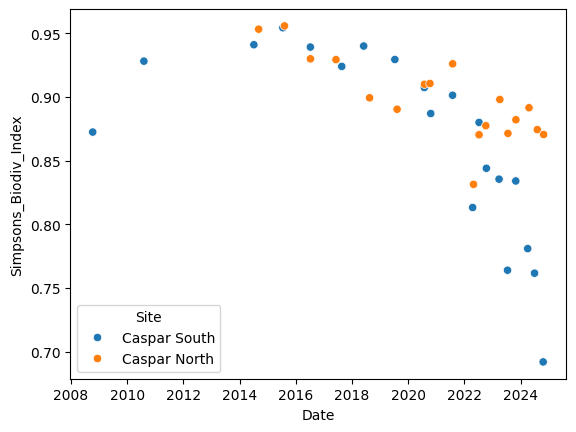

In [88]:
sns.scatterplot(caspar_simpsons, x='Date',y='Simpsons_Biodiv_Index', hue='Site')

**Looks like 2016 and 2021 might be good filters**

In [89]:
caspar_simpsons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 18 to 17
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Site                   38 non-null     object        
 1   Date                   38 non-null     datetime64[ns]
 2   Year                   38 non-null     int32         
 3   Month                  38 non-null     object        
 4   Day                    38 non-null     int32         
 5   Month_Day              38 non-null     object        
 6   Dateordinal            38 non-null     int64         
 7   DayofYear              38 non-null     int64         
 8   Simpsons_Biodiv_Index  38 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(3)
memory usage: 2.7+ KB


In [90]:
print("Pre-2016 Mean and StdDev of Simpson's Diversity Index for Caspar Cove:",'\n\n',
      caspar_simpsons[caspar_simpsons.Year<2016].Simpsons_Biodiv_Index.mean(), 
      caspar_simpsons[caspar_simpsons.Year<2016].Simpsons_Biodiv_Index.std(),'\n\n'
      "Post-2021 Mean and StdDev of Simpson's Diversity Index for Caspar Cove:",'\n\n',
      caspar_simpsons[caspar_simpsons.Year>2021].Simpsons_Biodiv_Index.mean(),
      caspar_simpsons[caspar_simpsons.Year>2021].Simpsons_Biodiv_Index.std())

Pre-2016 Mean and StdDev of Simpson's Diversity Index for Caspar Cove: 

 0.9341819458450189 0.032028186448964664 

Post-2021 Mean and StdDev of Simpson's Diversity Index for Caspar Cove: 

 0.8374002339052514 0.055761636392965774


**BIG Difference! Biodiversity dropped by almost 10% over a 6 year period.**

**By increasing the date of the upper bound, we can see that the lowest values and in the more recent years.**

In [91]:
print("Pre-2016 Mean and StdDev of Simpson's Diversity Index for Caspar Cove:",'\n\n',
      caspar_simpsons[caspar_simpsons.Year<2016].Simpsons_Biodiv_Index.mean(), 
      caspar_simpsons[caspar_simpsons.Year<2016].Simpsons_Biodiv_Index.std(),'\n\n'
      "Post-2022 Mean and StdDev of Simpson's Diversity Index for Caspar Cove:",'\n\n',
      caspar_simpsons[caspar_simpsons.Year>2022].Simpsons_Biodiv_Index.mean(),
      caspar_simpsons[caspar_simpsons.Year>2022].Simpsons_Biodiv_Index.std())

Pre-2016 Mean and StdDev of Simpson's Diversity Index for Caspar Cove: 

 0.9341819458450189 0.032028186448964664 

Post-2022 Mean and StdDev of Simpson's Diversity Index for Caspar Cove: 

 0.8297116728244291 0.06534791633736615


**Checked if it was the same for the surround reefs, and it was! moved the code up to group df results together.**

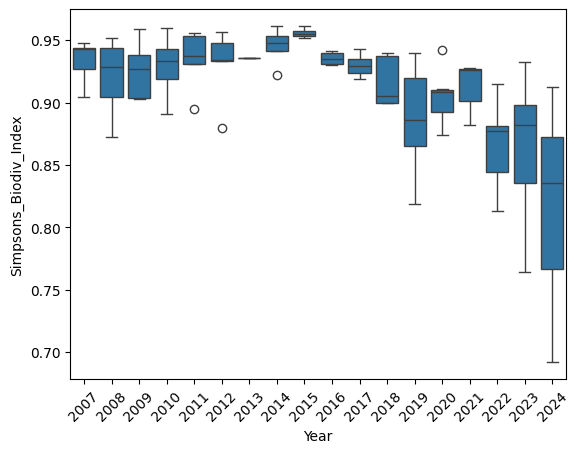

In [92]:
sns.boxplot(data=simpsons_biodiv, x='Year',y='Simpsons_Biodiv_Index')
plt.xticks(rotation=45)
plt.show()

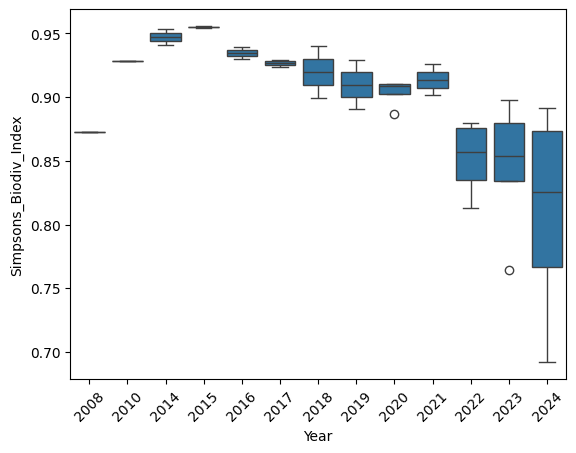

In [93]:
caspar_simpsons
sns.boxplot(data=caspar_simpsons, x='Year',y='Simpsons_Biodiv_Index')
plt.xticks(rotation=45)
plt.show()

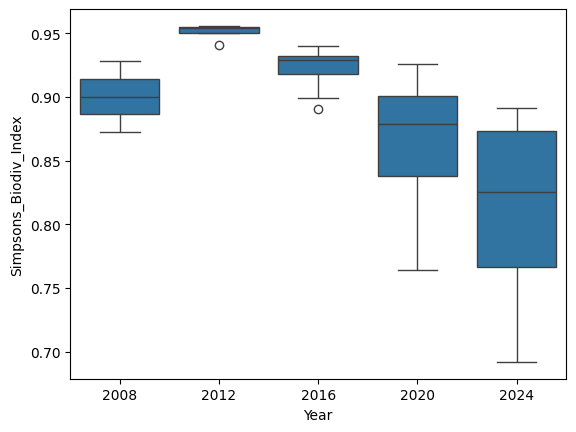

In [94]:
sns.boxplot(data=caspar_simpsons, x=caspar_simpsons['Year'] // 4 * 4,y='Simpsons_Biodiv_Index')
plt.show()

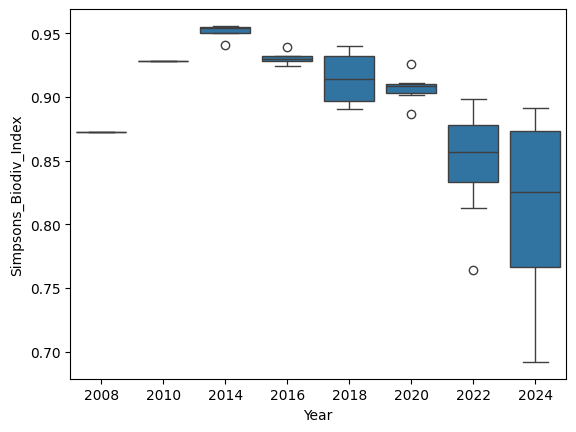

In [95]:
sns.boxplot(data=caspar_simpsons, x=caspar_simpsons['Year'] // 2 * 2,y='Simpsons_Biodiv_Index')
plt.show()

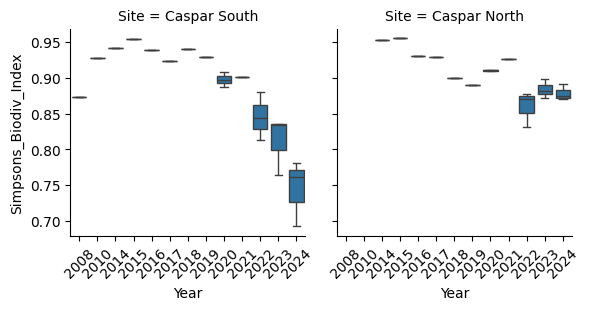

In [96]:
fig=sns.FacetGrid(data=caspar_simpsons,col='Site')
fig.map_dataframe(sns.boxplot,'Year','Simpsons_Biodiv_Index')
fig.set_xticklabels(rotation=45)
plt.show()

In [97]:
caspar_urchabstar

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
694,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Red Abalone,41,180.0,360.0
693,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Purple Urchin,6,180.0,360.0
701,Caspar South,2008-10-11,2008,Oct,11,Oct-11,733326,285,Sunflower Star,2,180.0,360.0
722,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,Red Abalone,102,180.0,360.0
721,Caspar South,2010-08-07,2010,Aug,7,Aug-07,733991,219,Purple Urchin,1,180.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,Caspar South,2024-10-20,2024,Oct,20,Oct-20,739179,294,Red Abalone,1,180.0,360.0
1299,Caspar South,2024-10-20,2024,Oct,20,Oct-20,739179,294,Purple Urchin,4386,180.0,360.0
673,Caspar North,2024-10-26,2024,Oct,26,Oct-26,739185,300,Sunflower Star,0,180.0,360.0
664,Caspar North,2024-10-26,2024,Oct,26,Oct-26,739185,300,Red Abalone,0,180.0,360.0


# What about Seasonal Trends?

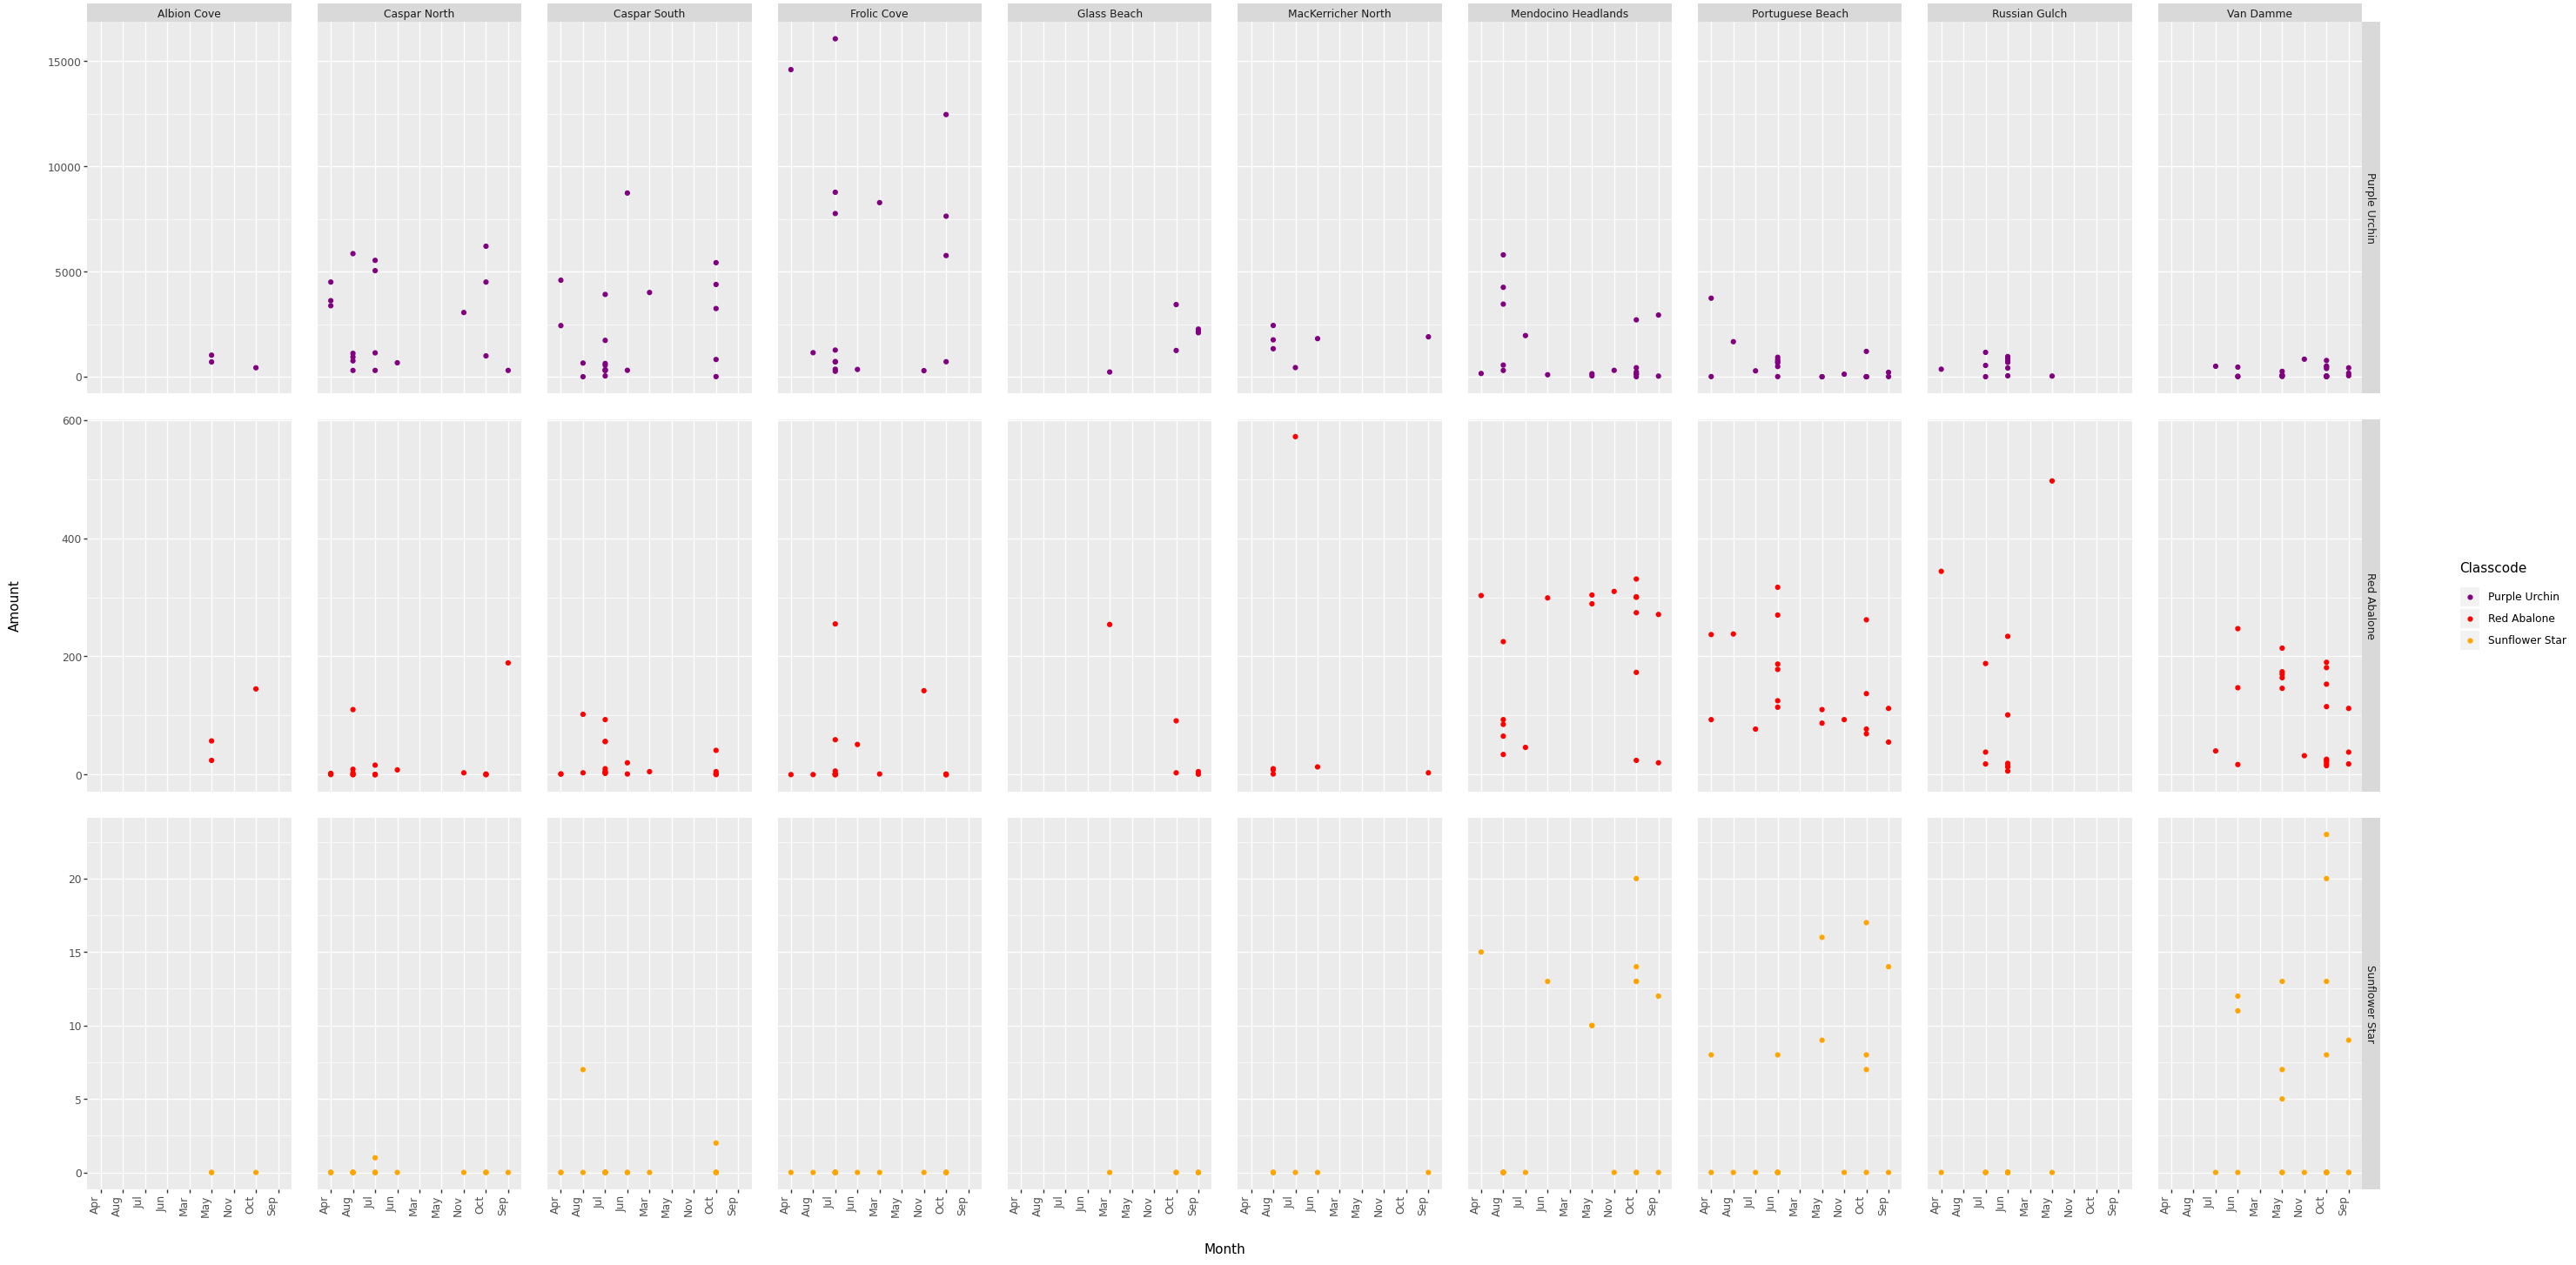

In [98]:
(ggplot(ftbrgg_urchabstar, aes(x='Month',y='Amount',color='Classcode'))
 +geom_point()
 +facet_grid(rows='Classcode',cols='Site', scales='free_y')
+theme(axis_text_x = element_text(angle=90, hjust=1))
+theme(figure_size=(30,15))
+scale_color_manual(['purple','red','orange'])).draw()

In [99]:
ftbrgg_urchabstar

,Site,Date,Year,Month,Day,Month_Day,Dateordinal,DayofYear,Classcode,Amount,Distance,Area_m2
3758,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Sunflower Star,5,180.0,360.0
3751,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Red Abalone,164,180.0,360.0
3750,Van Damme,2007-05-15,2007,May,15,May-15,732811,135,Purple Urchin,54,180.0,360.0
2266,Mendocino Headlands,2007-05-16,2007,May,16,May-16,732812,136,Purple Urchin,43,180.0,360.0
2274,Mendocino Headlands,2007-05-16,2007,May,16,May-16,732812,136,Sunflower Star,10,180.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4376,Van Damme,2024-10-24,2024,Oct,24,Oct-24,739183,298,Red Abalone,18,690.0,1380.0
4385,Van Damme,2024-10-24,2024,Oct,24,Oct-24,739183,298,Sunflower Star,0,180.0,360.0
673,Caspar North,2024-10-26,2024,Oct,26,Oct-26,739185,300,Sunflower Star,0,180.0,360.0
664,Caspar North,2024-10-26,2024,Oct,26,Oct-26,739185,300,Red Abalone,0,180.0,360.0


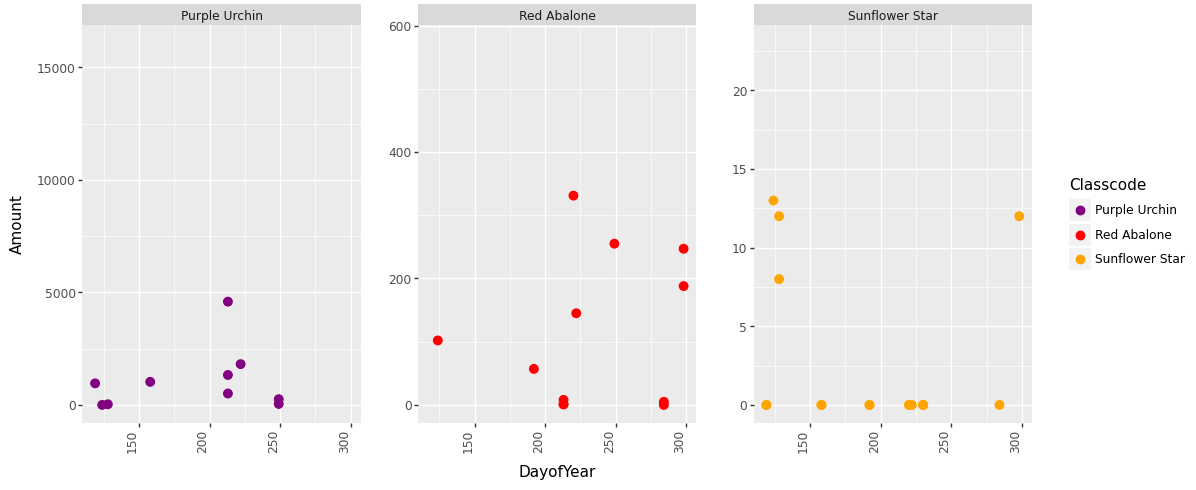

In [100]:
(ggplot(ftbrgg_urchabstar, aes(x=pd.to_numeric(ftbrgg_urchabstar['DayofYear']),y='Amount',color='Classcode'))
 +geom_point(size=3)
 +scale_color_manual(['purple','red','orange'])
+theme(axis_text_x = element_text(angle=90, hjust=1))
+theme(figure_size=(12,5))
 +facet_wrap('Classcode', scales='free_y')
).draw()

In [101]:
order = [1.00, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70]

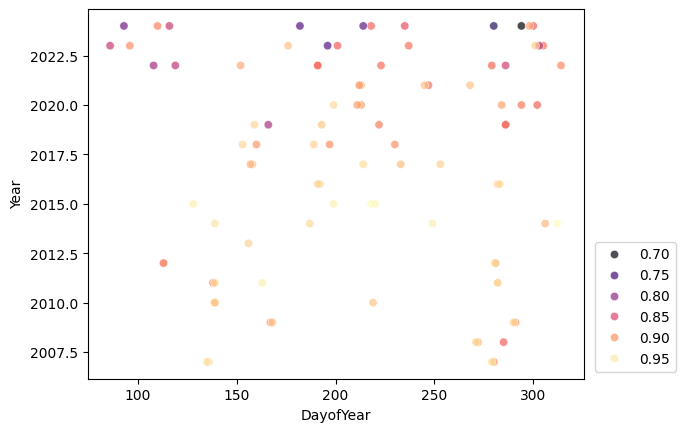

In [102]:
sns.scatterplot(simpsons_biodiv, x='DayofYear', 
                y ='Year', hue='Simpsons_Biodiv_Index', palette = sns.color_palette('magma', as_cmap=True),
                sizes=(10),alpha=0.7)

plt.legend(loc='lower right', bbox_to_anchor=(1.2,0))
plt.show()


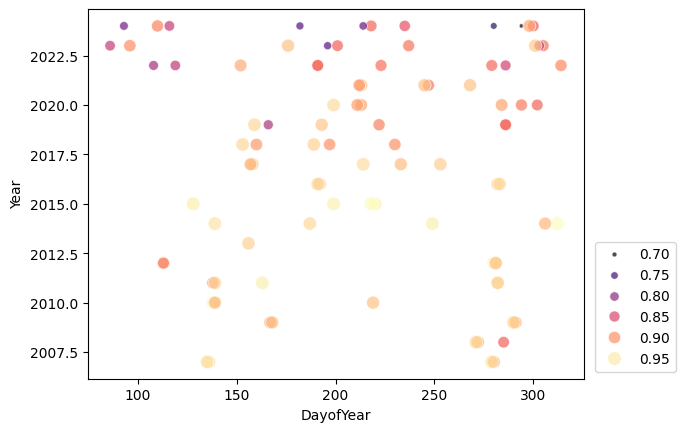

In [103]:
sns.scatterplot(simpsons_biodiv, x='DayofYear', size ='Simpsons_Biodiv_Index', 
                y ='Year', hue='Simpsons_Biodiv_Index', palette = sns.color_palette('magma', as_cmap=True),
                sizes=(10,100), alpha=0.7 )

plt.legend(loc='lower right', bbox_to_anchor=(1.2,0))
plt.show()


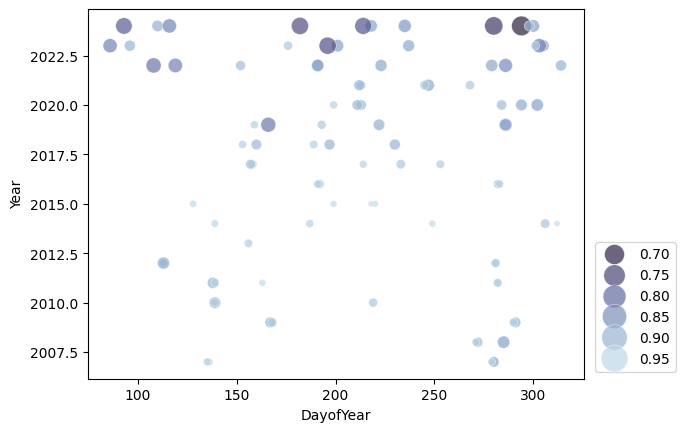

In [104]:
sns.scatterplot(simpsons_biodiv, x='DayofYear', size ='Simpsons_Biodiv_Index', 
                y ='Year', hue='Simpsons_Biodiv_Index', palette = sns.color_palette("ch:s=.25,rot=-.25_r", n_colors=15, as_cmap=True),
                sizes=(200,20), alpha=0.7 )

plt.legend(loc='lower right', bbox_to_anchor=(1.2,0))
plt.show()


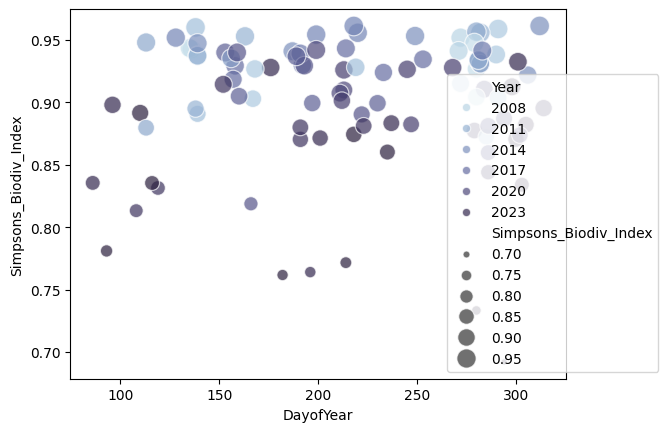

In [105]:
sns.scatterplot(simpsons_biodiv, x='DayofYear', y ='Simpsons_Biodiv_Index', 
                hue ='Year', size='Simpsons_Biodiv_Index', palette = sns.color_palette("ch:s=.25,rot=-.25", n_colors=15, as_cmap=True),
                sizes=(20,200), alpha=0.7 )

plt.legend(loc='lower right', bbox_to_anchor=(1.2,0))
plt.show()

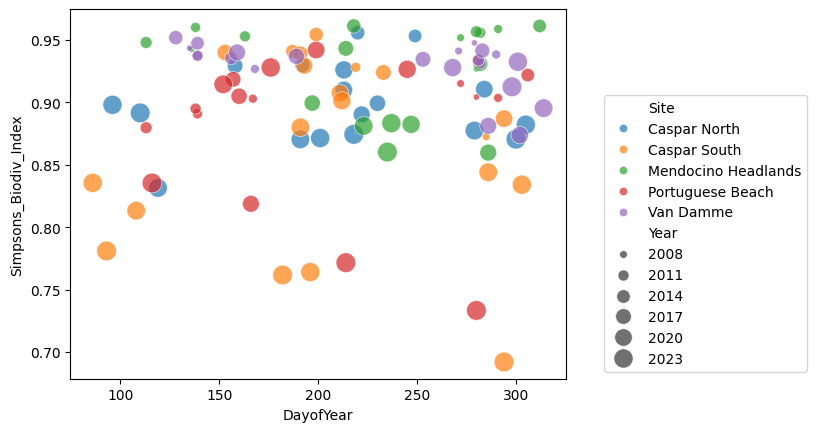

In [106]:
sns.scatterplot(simpsons_biodiv, x='DayofYear', y ='Simpsons_Biodiv_Index', 
                size ='Year', hue='Site',
                sizes=(20,200), alpha=0.7 )

plt.legend(loc='lower right', bbox_to_anchor=(1.5,0))
plt.show()

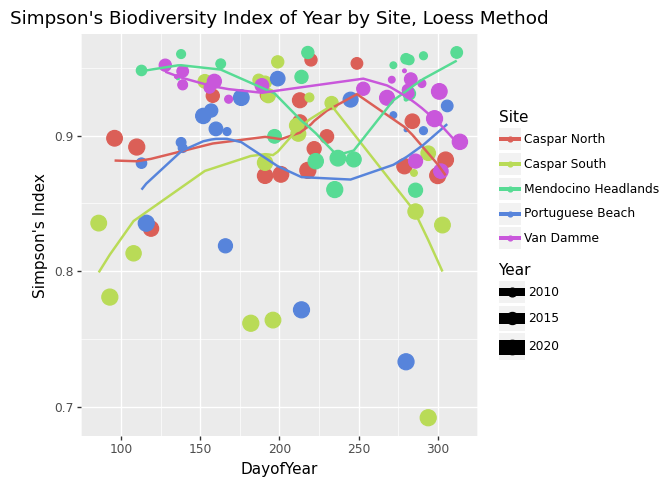

In [107]:
(ggplot(simpsons_biodiv, aes('DayofYear','Simpsons_Biodiv_Index',color='Site', size='Year'))
+geom_point()
+ggtitle("Simpson's Biodiversity Index of Year by Site, Loess Method")
+scale_y_continuous(name="Simpson's Index")
+stat_smooth(method='loess', se=False)).draw()

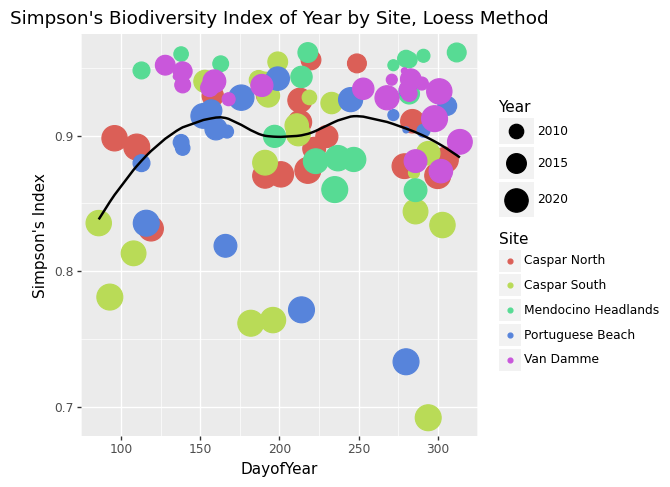

In [108]:
(ggplot(simpsons_biodiv, aes('DayofYear','Simpsons_Biodiv_Index'))
+geom_point(aes(color='Site', size='Year'))
 +scale_size(range=(2,10))
+ggtitle("Simpson's Biodiversity Index of Year by Site, Loess Method")
+scale_y_continuous(name="Simpson's Index")
+stat_smooth(method='loess', se=False)).draw()

In [109]:
[i for i in range(2,12)]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

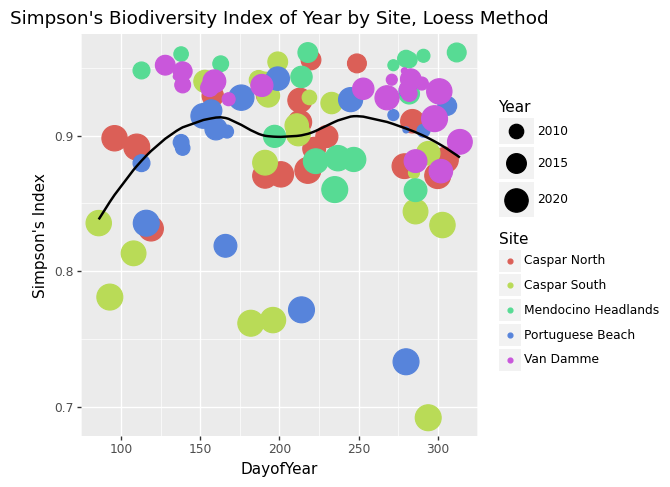

In [110]:
(ggplot(simpsons_biodiv, aes('DayofYear','Simpsons_Biodiv_Index'))
+geom_point(aes(color='Site', size='Year'))
 +scale_size(range=(2,10))
+ggtitle("Simpson's Biodiversity Index of Year by Site, Loess Method")
+scale_y_continuous(name="Simpson's Index")
+stat_smooth(method='loess', se=False)).draw()

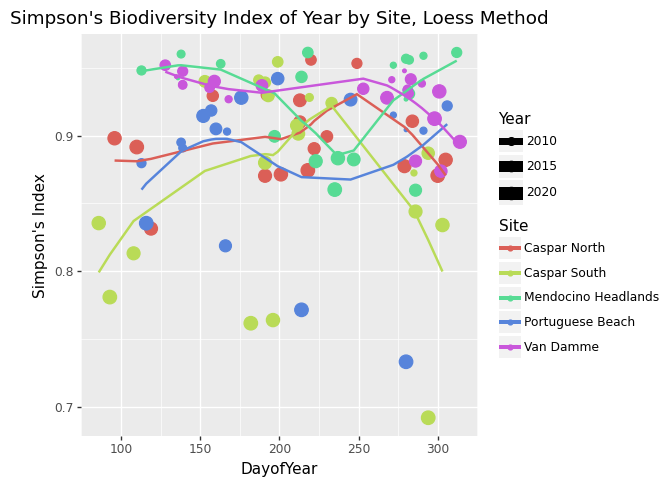

In [111]:

(ggplot(simpsons_biodiv, aes('DayofYear', 'Simpsons_Biodiv_Index', color='Site', size='Year'))
 + geom_point()
 + scale_size(range=(1, 5))  # Min and max size
 + ggtitle("Simpson's Biodiversity Index of Year by Site, Loess Method")
 + scale_y_continuous(name="Simpson's Index")
 + stat_smooth(method='loess', se=False)
).draw()


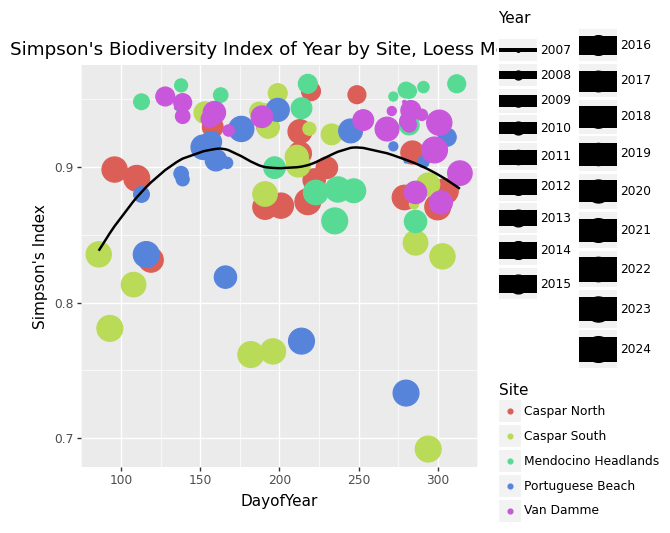

In [112]:

(ggplot(simpsons_biodiv, aes('DayofYear', 'Simpsons_Biodiv_Index', color='Site', size='Year'))
 + geom_point()
 + scale_size_continuous(range=(1, 10), breaks=range(2007, 2025))  # Range from 1 to 10, with breaks for each year
 + ggtitle("Simpson's Biodiversity Index of Year by Site, Loess Method")
 + scale_y_continuous(name="Simpson's Index")
 + stat_smooth(method='loess', se=False, color='black')  # One LOESS line across all data points
).draw()



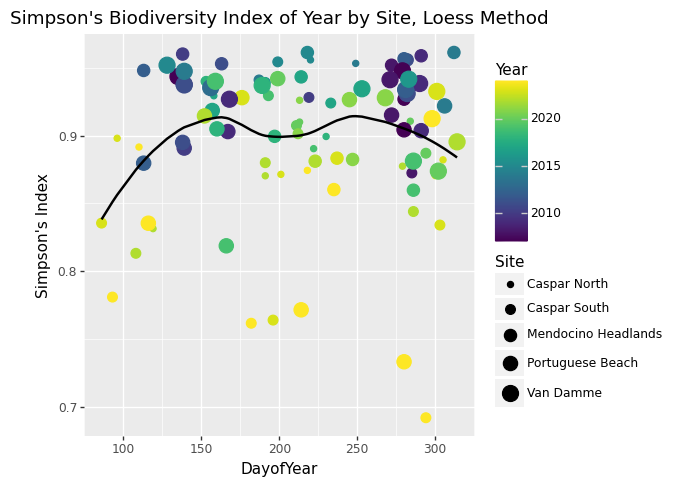

In [113]:

(ggplot(simpsons_biodiv, aes('DayofYear', 'Simpsons_Biodiv_Index'))
 + geom_point(aes(color='Year', size='Site'))
 + ggtitle("Simpson's Biodiversity Index of Year by Site, Loess Method")
 + scale_y_continuous(name="Simpson's Index")
 + stat_smooth(method='loess', se=False, color='black')  # One LOESS line across all data points
).draw()


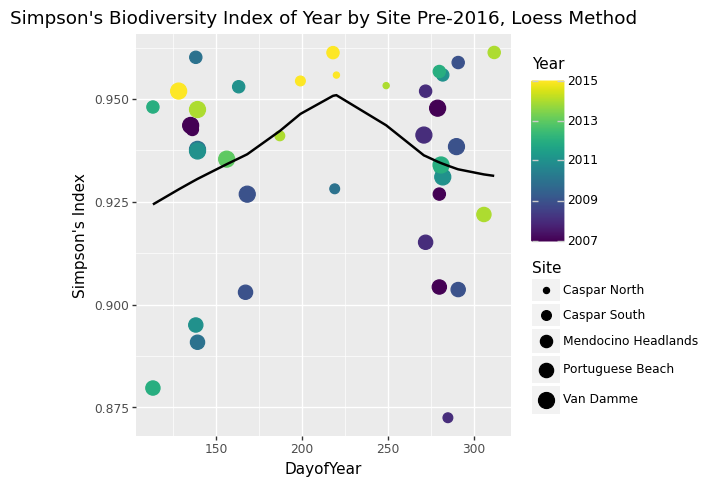

In [114]:

(ggplot(simpsons_biodiv[simpsons_biodiv.Year<2016], aes('DayofYear', 'Simpsons_Biodiv_Index'))
 + geom_point(aes(color='Year', size='Site'))
 + ggtitle("Simpson's Biodiversity Index of Year by Site Pre-2016, Loess Method")
 + scale_y_continuous(name="Simpson's Index")
 + stat_smooth(method='loess', se=False, color='black')  # One LOESS line across all data points
).draw()


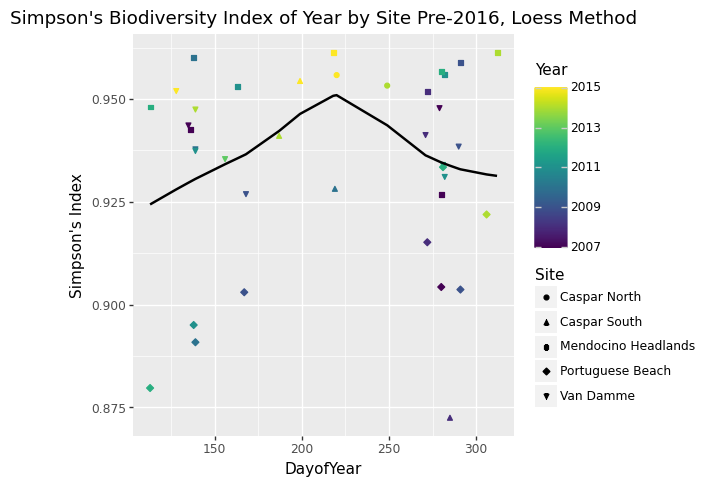

In [115]:

(ggplot(simpsons_biodiv[simpsons_biodiv.Year<2016], aes('DayofYear', 'Simpsons_Biodiv_Index'))
 + geom_point(aes(color='Year', shape='Site'))
 + ggtitle("Simpson's Biodiversity Index of Year by Site Pre-2016, Loess Method")
 + scale_y_continuous(name="Simpson's Index")
 + stat_smooth(method='loess', se=False, color='black')  # One LOESS line across all data points
).draw()


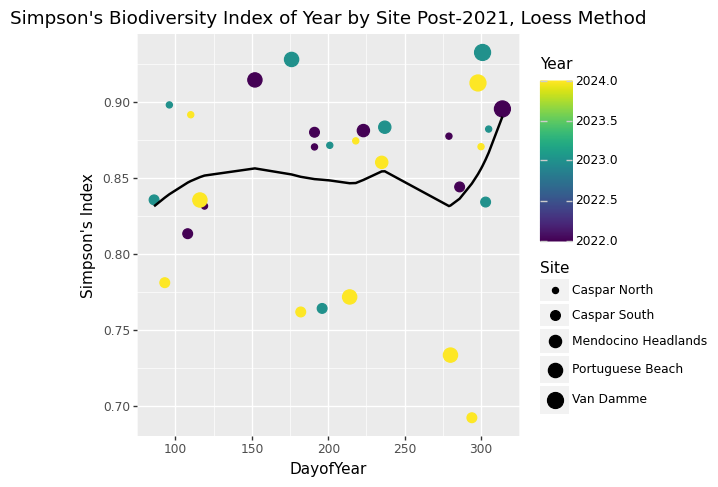

In [116]:

(ggplot(simpsons_biodiv[simpsons_biodiv.Year>2021], aes('DayofYear', 'Simpsons_Biodiv_Index'))
 + geom_point(aes(color='Year', size='Site'))
 + ggtitle("Simpson's Biodiversity Index of Year by Site Post-2021, Loess Method")
 + scale_y_continuous(name="Simpson's Index")
 + stat_smooth(method='loess', se=False, color='black')  # One LOESS line across all data points
).draw()


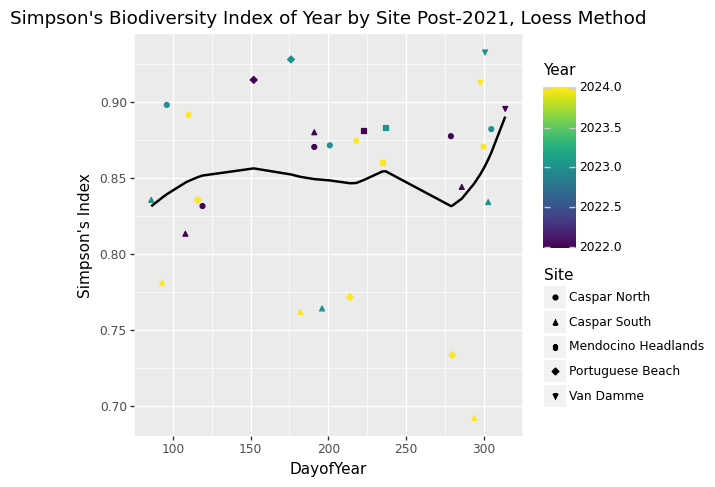

In [117]:

(ggplot(simpsons_biodiv[simpsons_biodiv.Year>2021], aes('DayofYear', 'Simpsons_Biodiv_Index'))
 + geom_point(aes(color='Year', shape='Site'))
 + ggtitle("Simpson's Biodiversity Index of Year by Site Post-2021, Loess Method")
 + scale_y_continuous(name="Simpson's Index")
 + stat_smooth(method='loess', se=False, color='black')  # One LOESS line across all data points
).draw()
